# Flight Status Predictor

## Executive Summary

This project is an educational initiative designed to familiarize us with the Machine Learning (ML) Pipeline. While our primary goal is to develop an ML model that predicts significant flight delays, it's important to note that we're focusing on the learning process rather than creating the most robust model possible. The project aims to build a tool that can forecast whether the arrival time of the flight will be delayed by more than 15 minutes. Users input specific details about their flight, and our model provides a straightforward yes or no prediction. This approach allows us to explore and understand each stage of the ML pipeline, from data preparation and feature selection to model training and evaluation.

At the heart of this project is a comprehensive dataset comprising **over 6.7 million flights from April 2023 to March 2024**. This meticulously cleaned and prepared data not only powers our predictive model but also serves as a valuable resource for exploratory data analysis (EDA) and further machine learning applications in the aviation domain.

The project is designed to empower travelers, airlines, and analysts alike. By transforming raw flight data into actionable insights, we're working to enhance travel planning, improve airline operations, and deepen our understanding of air travel patterns. This project bridges the gap between big data and practical applications, ultimately aiming to make air travel more predictable and less stressful for everyone involved.

**What problem are we trying to solve?**

The goal of this project is to **develop and deploy an ML model** in which an end user can specify a set of features describing a commercial flight of interest and receive a categorical (yes or no) output indicating if the arrival time of that flight will be delayed more than fifteen minutes or not. 

**Model is ready to be deployed as a pkl file**

---

In [4]:
# Import libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score, f1_score, precision_recall_curve, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
import joblib
import scipy
from joblib import dump
%matplotlib inline

In [5]:
# Store CSV file in variable 
flights = r'..\data\DF_from_Feature_Sel_for_Model_Sel.csv'
# Read CSV file in pandas dataframe 
df = pd.read_csv(flights)

In [6]:
# Print dataframe to confirm successful loading
df

,Carrier_Name,Week_Day,Flight_Date,Flight_Number,Origin_City_State,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,Scheduled_Arrival_Time,Scheduled_Gate_to_Gate_Time,Distance_Miles,Distance_Group,delayed
0,United Air Lines Inc.,Tuesday,2023-09-05,773,"Denver, CO","Nashville, TN",Afternoon,1743,2119,156,1014,5,0
1,Delta Air Lines Inc.,Friday,2024-03-29,2641,"Salt Lake City, UT","Seattle, WA",Afternoon,1710,1823,133,689,3,0
2,American Airlines Inc.,Sunday,2023-06-04,2677,"Orlando, FL","Dallas/Fort Worth, TX",Early Morning,550,745,175,985,4,0
3,Delta Air Lines Inc.,Friday,2023-08-04,1451,"Jacksonville, FL","Boston, MA",Early Afternoon,1215,1459,164,1010,5,1
4,Southwest Airlines Co.,Tuesday,2023-04-18,185,"Dallas, TX","Indianapolis, IN",Evening,1955,2255,120,755,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,Thursday,2023-10-26,4815,"Dallas/Fort Worth, TX","Killeen, TX",Morning,1044,1202,78,134,1,1
2742898,Southwest Airlines Co.,Thursday,2023-07-20,4277,"Las Vegas, NV","El Paso, TX",Afternoon,1620,1905,105,583,3,1
2742899,Endeavor Air Inc.,Saturday,2024-01-27,4915,"Des Moines, IA","New York, NY",Early Afternoon,1300,1644,164,1031,5,0
2742900,Southwest Airlines Co.,Thursday,2023-07-20,1817,"Phoenix, AZ","St. Louis, MO",Evening,2015,115,180,1262,6,1


# Data Preprocessing (Data Cleaning and Preparation)

I'm tackling the critical task of data preprocessing. My goal is to transform millions of raw flight records into a clean, analysis-ready dataset. I'm carefully cleaning and structuring the downsampled data from **over 2.7 million** flights, selecting the most relevant features, and ensuring the information is in the best format for our machine learning model. This process not only sets the stage for accurate delay predictions but also creates a valuable resource for broader aviation insights. By focusing on data quality and accessibility, I'm laying the groundwork for both our immediate project goals and future exploratory analyses in the fascinating world of air travel.

<span style="color:red">**NOTE**</span>: This step was mostly taken care of during EDA, Feature Selection Model Selection, and Model Creation but wanted to still view the data and make any necessary adjustments

In [9]:
df.columns

Index(['Carrier_Name', 'Week_Day', 'Flight_Date', 'Flight_Number',
       'Origin_City_State', 'Destination_City_State', 'Dep_Time_Block_Group',
       'Scheduled_Departure_Time', 'Scheduled_Arrival_Time',
       'Scheduled_Gate_to_Gate_Time', 'Distance_Miles', 'Distance_Group',
       'delayed'],
      dtype='object')

### Check For Correct Dtypes

Checking for correct data types (dtypes) is crucial in data preprocessing as it ensures data integrity and optimizes performance. Proper dtypes facilitate accurate calculations, enable efficient storage, and allow for seamless functionality with data analysis libraries. Moreover, correct dtypes improve machine learning model accuracy and enable more effective feature engineering, which is essential for our flight delay prediction project.

In [11]:
# Get summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742902 entries, 0 to 2742901
Data columns (total 13 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   Carrier_Name                 object
 1   Week_Day                     object
 2   Flight_Date                  object
 3   Flight_Number                int64 
 4   Origin_City_State            object
 5   Destination_City_State       object
 6   Dep_Time_Block_Group         object
 7   Scheduled_Departure_Time     int64 
 8   Scheduled_Arrival_Time       int64 
 9   Scheduled_Gate_to_Gate_Time  int64 
 10  Distance_Miles               int64 
 11  Distance_Group               int64 
 12  delayed                      int64 
dtypes: int64(7), object(6)
memory usage: 272.0+ MB


Columns that need to be converted to Object dtype: 
- Flight_Number

Holding off on converting since some columns will not be needed for analysis

### NULL and Duplicate Values

Checking for **null** records is crucial as they can skew analyses and cause errors in our flight delay prediction model, requiring appropriate handling through imputation or removal. Identifying and addressing **duplicate** records prevents data inflation and bias, ensuring each flight is represented accurately without undue influence on our predictions. These checks are fundamental to maintaining data integrity and building a reliable model, especially given our large downsampled dataset of **2.7+ million** flight records.

In [15]:
# Check for missing values 
print(df.isnull().sum())

Carrier_Name                   0
Week_Day                       0
Flight_Date                    0
Flight_Number                  0
Origin_City_State              0
Destination_City_State         0
Dep_Time_Block_Group           0
Scheduled_Departure_Time       0
Scheduled_Arrival_Time         0
Scheduled_Gate_to_Gate_Time    0
Distance_Miles                 0
Distance_Group                 0
delayed                        0
dtype: int64


In [16]:
# Check for duplicate entries
df[df.duplicated()]

,Carrier_Name,Week_Day,Flight_Date,Flight_Number,Origin_City_State,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,Scheduled_Arrival_Time,Scheduled_Gate_to_Gate_Time,Distance_Miles,Distance_Group,delayed


As stated before during EDA and Feature Selection, there doesn't appear to be any duplicated rows

Remember, during EDA, we already renamed the target variable column **Arr_Delay_At_Least_15_Minutes** to **delayed**

In [19]:
df.columns

Index(['Carrier_Name', 'Week_Day', 'Flight_Date', 'Flight_Number',
       'Origin_City_State', 'Destination_City_State', 'Dep_Time_Block_Group',
       'Scheduled_Departure_Time', 'Scheduled_Arrival_Time',
       'Scheduled_Gate_to_Gate_Time', 'Distance_Miles', 'Distance_Group',
       'delayed'],
      dtype='object')

---

# Feature Selection

Based off the information gathered in Feature Selection using the Phik Coreelation Matrix, the following features will be used to deploy the model: 

> Categorical Variables:
> - Carrier_Name
> - Dep_Time_Block_Group
> - Flight_Date (Month) - Will need to convert this to actual month (Jan, Feb, Mar, etc.) to avoid ordinality with numbers
>
> Numeric Variables:
> - Scheduled_Arrival_Time
> - Scheduled_Departure_Time
> - Flight_Date (Year)
> - Flight_Date (Day)
> - delayed (target variable)

In [22]:
# Add highly correlated features into a new dataframe 
df_features = pd.DataFrame(data=df[['Carrier_Name', 'Flight_Date', 'Dep_Time_Block_Group', 'Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 'delayed']])
df_features

,Carrier_Name,Flight_Date,Dep_Time_Block_Group,Scheduled_Arrival_Time,Scheduled_Departure_Time,delayed
0,United Air Lines Inc.,2023-09-05,Afternoon,2119,1743,0
1,Delta Air Lines Inc.,2024-03-29,Afternoon,1823,1710,0
2,American Airlines Inc.,2023-06-04,Early Morning,745,550,0
3,Delta Air Lines Inc.,2023-08-04,Early Afternoon,1459,1215,1
4,Southwest Airlines Co.,2023-04-18,Evening,2255,1955,1
...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,2023-10-26,Morning,1202,1044,1
2742898,Southwest Airlines Co.,2023-07-20,Afternoon,1905,1620,1
2742899,Endeavor Air Inc.,2024-01-27,Early Afternoon,1644,1300,0
2742900,Southwest Airlines Co.,2023-07-20,Evening,115,2015,1


In [23]:
# Convert 'Flight_Date' to datetime objects
df_features['Flight_Date'] = pd.to_datetime(df_features['Flight_Date'])

# Extract month, year, and day
df_features['Month'] = df_features['Flight_Date'].dt.month
df_features['Year'] = df_features['Flight_Date'].dt.year
df_features['Day'] = df_features['Flight_Date'].dt.day

In [24]:
df_features

,Carrier_Name,Flight_Date,Dep_Time_Block_Group,Scheduled_Arrival_Time,Scheduled_Departure_Time,delayed,Month,Year,Day
0,United Air Lines Inc.,2023-09-05,Afternoon,2119,1743,0,9,2023,5
1,Delta Air Lines Inc.,2024-03-29,Afternoon,1823,1710,0,3,2024,29
2,American Airlines Inc.,2023-06-04,Early Morning,745,550,0,6,2023,4
3,Delta Air Lines Inc.,2023-08-04,Early Afternoon,1459,1215,1,8,2023,4
4,Southwest Airlines Co.,2023-04-18,Evening,2255,1955,1,4,2023,18
...,...,...,...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,2023-10-26,Morning,1202,1044,1,10,2023,26
2742898,Southwest Airlines Co.,2023-07-20,Afternoon,1905,1620,1,7,2023,20
2742899,Endeavor Air Inc.,2024-01-27,Early Afternoon,1644,1300,0,1,2024,27
2742900,Southwest Airlines Co.,2023-07-20,Evening,115,2015,1,7,2023,20


In [25]:
# Convert Month to actual month (Jan, Feb, Mar, etc.)
df_features['Month'] = pd.to_datetime(df_features['Month'], format="%m").dt.strftime("%b")

In [26]:
df_features

,Carrier_Name,Flight_Date,Dep_Time_Block_Group,Scheduled_Arrival_Time,Scheduled_Departure_Time,delayed,Month,Year,Day
0,United Air Lines Inc.,2023-09-05,Afternoon,2119,1743,0,Sep,2023,5
1,Delta Air Lines Inc.,2024-03-29,Afternoon,1823,1710,0,Mar,2024,29
2,American Airlines Inc.,2023-06-04,Early Morning,745,550,0,Jun,2023,4
3,Delta Air Lines Inc.,2023-08-04,Early Afternoon,1459,1215,1,Aug,2023,4
4,Southwest Airlines Co.,2023-04-18,Evening,2255,1955,1,Apr,2023,18
...,...,...,...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,2023-10-26,Morning,1202,1044,1,Oct,2023,26
2742898,Southwest Airlines Co.,2023-07-20,Afternoon,1905,1620,1,Jul,2023,20
2742899,Endeavor Air Inc.,2024-01-27,Early Afternoon,1644,1300,0,Jan,2024,27
2742900,Southwest Airlines Co.,2023-07-20,Evening,115,2015,1,Jul,2023,20


In [27]:
# Drop unnecessary columns from new dataframe 
df_features.drop(['Flight_Date'], axis=1, inplace=True)

In [28]:
df_features

,Carrier_Name,Dep_Time_Block_Group,Scheduled_Arrival_Time,Scheduled_Departure_Time,delayed,Month,Year,Day
0,United Air Lines Inc.,Afternoon,2119,1743,0,Sep,2023,5
1,Delta Air Lines Inc.,Afternoon,1823,1710,0,Mar,2024,29
2,American Airlines Inc.,Early Morning,745,550,0,Jun,2023,4
3,Delta Air Lines Inc.,Early Afternoon,1459,1215,1,Aug,2023,4
4,Southwest Airlines Co.,Evening,2255,1955,1,Apr,2023,18
...,...,...,...,...,...,...,...,...
2742897,SkyWest Airlines Inc.,Morning,1202,1044,1,Oct,2023,26
2742898,Southwest Airlines Co.,Afternoon,1905,1620,1,Jul,2023,20
2742899,Endeavor Air Inc.,Early Afternoon,1644,1300,0,Jan,2024,27
2742900,Southwest Airlines Co.,Evening,115,2015,1,Jul,2023,20


In [29]:
# Check for missing values 
print(df_features.isnull().sum())

Carrier_Name                0
Dep_Time_Block_Group        0
Scheduled_Arrival_Time      0
Scheduled_Departure_Time    0
delayed                     0
Month                       0
Year                        0
Day                         0
dtype: int64


In [30]:
# Grouping numerical columns and
# Moving the target variable to be the right-most column

# Columns to move
cols_to_move = [
                'Carrier_Name',
                'Dep_Time_Block_Group',
                'Month',
                'Year',
                'Day',
                'Scheduled_Arrival_Time', 
                'Scheduled_Departure_Time'
                ]

last_col = 'delayed'

# Extracting the columns to move
columns_to_move = df_features[cols_to_move]

# Dropping these columns from the DataFrame
df_features.drop(columns=cols_to_move, inplace=True)

# Extracting the last column
last_column = df_features.pop(last_col)

# Reinserting the numerical columns
df_features = pd.concat([df_features, columns_to_move], axis=1)

# Reinserting the last column
df_features[last_col] = last_column

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742902 entries, 0 to 2742901
Data columns (total 8 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Carrier_Name              object
 1   Dep_Time_Block_Group      object
 2   Month                     object
 3   Year                      int32 
 4   Day                       int32 
 5   Scheduled_Arrival_Time    int64 
 6   Scheduled_Departure_Time  int64 
 7   delayed                   int64 
dtypes: int32(2), int64(3), object(3)
memory usage: 146.5+ MB


In [31]:
# Define categorical and numerical features
categorical_features = ['Carrier_Name', 'Dep_Time_Block_Group', 'Month']
numerical_features = ['Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 'Year', 'Day']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Redefine X (features) and y (target) variables
X = df_features[['Carrier_Name', 'Year', 'Month', 'Day', 'Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 
                'Dep_Time_Block_Group']]
y = df_features["delayed"]

# Apply the preprocessing pipeline to X
x_preprocessed = preprocessor.fit_transform(X)

# Save preprocessor 
#dump(preprocessor, 'Model_Deploy_Olivia/flask/Logistic_Regression/preprocessor/flight_preprocessor.pkl')
#dump(preprocessor, 'Model_Deploy_Olivia/streamlit/Logistic_Regression/preprocessor/flight_preprocessor.pkl')
dump(preprocessor, 'Model_Deploy_Olivia/flask/CatBoost/preprocessor/flight_preprocessor.pkl')
dump(preprocessor, 'Model_Deploy_Olivia/streamlit/CatBoost/preprocessor/flight_preprocessor.pkl')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_preprocessed, y, test_size=0.2, random_state=42)

print(f"x_train shape: {X_train.shape}")
print(f"x_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (2194321, 37)
x_test shape: (548581, 37)
y_train shape: (2194321,)
y_test shape: (548581,)


---

# Model Creation: Logistic Regression

I've chosen logistic regression as the modeling technique as I decided to only work with one model. It's a great fit for what we're trying to achieve - predicting a simple yes or no outcome for flight delays.

Logistic regression excels at binary classification, which aligns perfectly with our goal of predicting whether the arrival time of the flight will be delayed by more than 15 minutes. It works by estimating probabilities, giving us insights into how likely a delay is based on various flight characteristics. I appreciate its interpretability - we can easily understand which factors are most influential in causing delays.

While it may not be the most complex algorithm out there, logistic regression provides us with a solid foundation for learning the ML pipeline. It allows us to transform our carefully preprocessed downsampled dataset of **2.7+ million** flights into meaningful predictions, balancing simplicity with effectiveness. This approach lets us focus on the learning process while still creating a useful tool for understanding flight delays.

In [34]:
# Logistic regression model
logreg = LogisticRegression(random_state=42)

# Train and evaluate the model
logreg.fit(X_train, y_train)
# Predictions on test data
y_pred = logreg.predict(X_test)

## Initial Model Performance

In [36]:
# Calculate confusion matrix
cm_init = confusion_matrix(y_test, y_pred)

# Calculate precision and recall
precision_init, recall_init, _ = precision_recall_curve(y_test, y_pred)

# Calculate ROC curve
fpr_init, tpr_init, _ = roc_curve(y_test, y_pred)

# Calculate ROC AUC score
roc_auc_init = roc_auc_score(y_test, y_pred)

# Calculate evaluation metrics
accuracy_init = accuracy_score(y_test, y_pred)
f1_init= f1_score(y_test, y_pred)

Confusion Matrix:
 [[164918 109501]
 [ 99262 174900]]

True Positives(TP) =  164918

True Negatives(TN) =  174900

False Positives(FP) =  109501

False Negatives(FN) =  99262

Accuracy: 0.6194490877372713
F1 Score: 0.6262498590132178
ROC AUC Score: 0.6194577481975653
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.60      0.61    274419
           1       0.61      0.64      0.63    274162

    accuracy                           0.62    548581
   macro avg       0.62      0.62      0.62    548581
weighted avg       0.62      0.62      0.62    548581



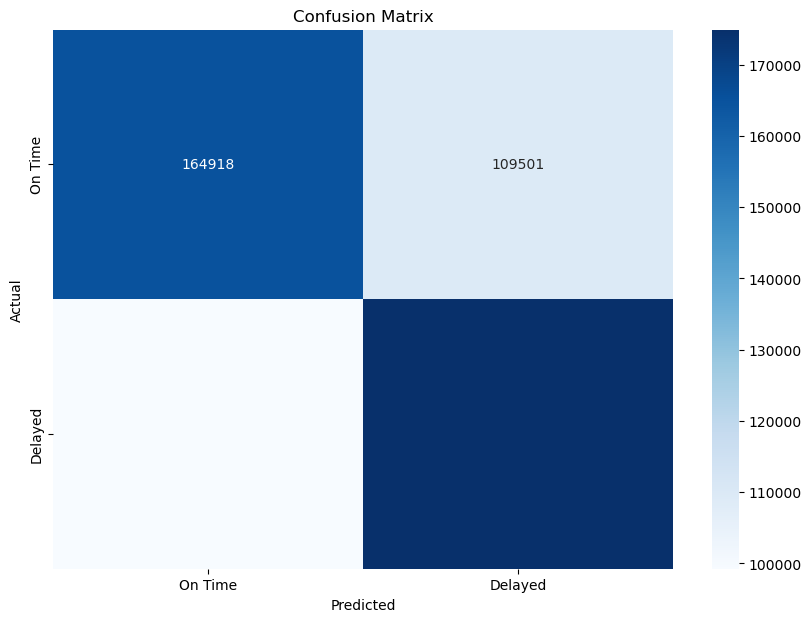

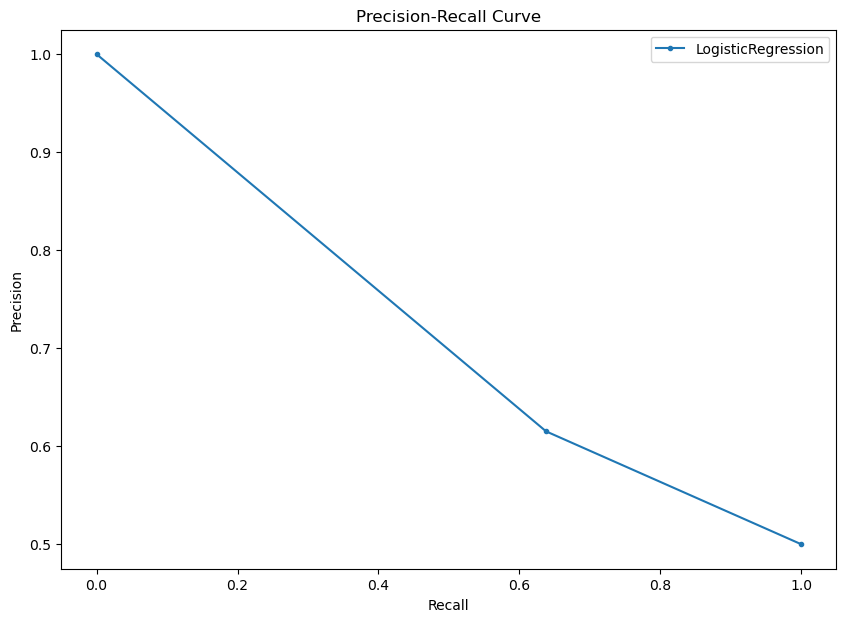

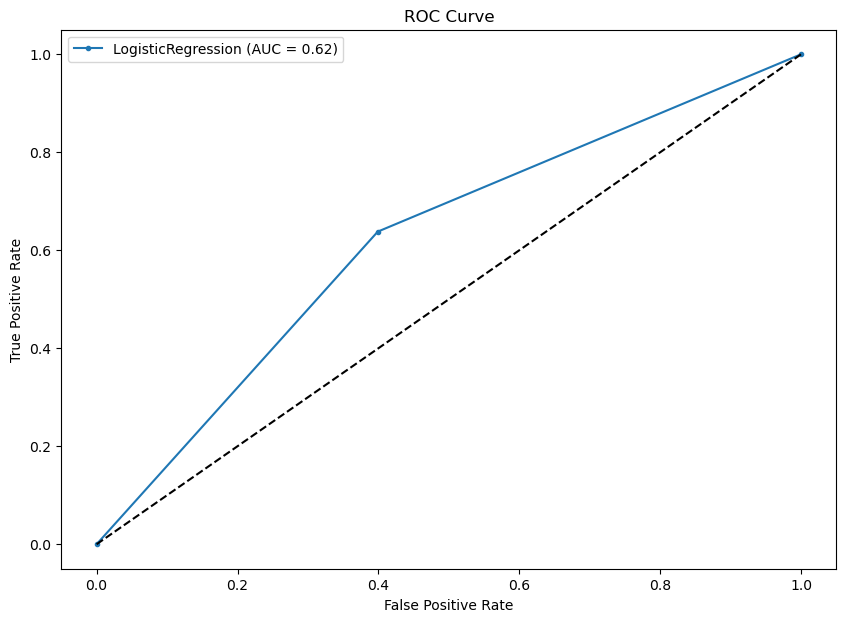

In [37]:
# Display metrics
print("Confusion Matrix:\n", cm_init)
print('\nTrue Positives(TP) = ', cm_init[0,0])
print('\nTrue Negatives(TN) = ', cm_init[1,1])
print('\nFalse Positives(FP) = ', cm_init[0,1])
print('\nFalse Negatives(FN) = ', cm_init[1,0])
print("\nAccuracy:", accuracy_init)
print("F1 Score:", f1_init)
print("ROC AUC Score:", roc_auc_init)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_init, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'], yticklabels=['On Time', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_init, precision_init, marker='.', label='LogisticRegression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_init, tpr_init, marker='.', label='LogisticRegression (AUC = %0.2f)' % roc_auc_init)
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Key Observations**
- The model has an accuracy of **61.94%**, meaning it correctly classifies approximately **62%** of the instances
- The F1 score, which balances precision and recall, is approximately **62.62%**, indicating a moderate performance
- The ROC AUC score is about **61.95%**, suggesting that the model is somewhat capable of distinguishing between the two classes, but there's room for improvement
- The classification report indicates similar performance for both classes, with precision, recall, and F1 scores around **60-64%**

Overall, while the model shows some ability to classify the data, its performance metrics suggest that there is considerable room for improvement

## K-Folds Cross Validation

I am using K-Fold Cross-Validation to thoroughly evaluate my logistic regression model's performance. This technique involves dividing our downsampled dataset of **2.7+ million** flights into 'k' subsets, training and validating the model multiple times to get a robust performance estimate. By doing so, we aim to ensure our model generalizes well to unseen data and isn't overfitting. This approach aligns with our goal of learning the ML pipeline process, helping us build a reliable model without focusing solely on achieving the highest possible accuracy.

This will ensure we did not get lucky with the test set, relieving of any bias in the data as it performs many iterations of the training set

In [42]:
# Defining k-Folds Cross Validation parameters
accuracies = cross_val_score(estimator = logreg,
                    X = x_preprocessed,
                    y = y,
                    scoring = 'accuracy',
                    cv = 10)

print("Accuracy: {:.3f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.3f}".format(accuracies.std()))

Accuracy: 62.014 %
Standard Deviation: 0.000


**Accuracy**: The accuracy **62.014%** suggests that the model is correctly predicting the target variable approximately **62.0%** of the time. This accuracy will serve as a baseline to gauge improvement after hyperparameter tuning 

**Standard Deviation**: The standard deviation of **0.000 (or 0%)** indicates that the accuracy across different folds is consistent, suggesting that the model's performance is stable across the dataset split

## Hyperparameter Tuning

Hyperparameter tuning is a key step in optimizing the flight delay prediction model. I am systematically adjusting settings like regularization strength and solver type in our logistic regression algorithm to find the best combination for accurate predictions. This process helps balance the model's fit to our training data with its ability to generalize to new flights. By fine-tuning these parameters, I am not only improving accuracy but also gaining insights into how different settings affect performance. This aligns with our goal of understanding the ML pipeline while creating an efficient prediction tool.

In [45]:
# Define the parameter grid for hyperparameter tuning

# Valid parameters for logistic regression: ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio',
#                                            'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 
#                                            'tol', 'verbose', 'warm_start'].
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 109],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [1000]  # Increase max_iter for 'lbfgs'
}
# Perform hyperparameter tuning using GridSearchCV
lr = LogisticRegression(random_state=42)
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best model
best_lr = grid_search.best_estimator_

# Print the best hyperparameters
print(grid_search.best_params_)

# Evaluate the best model
y_pred = best_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix of best model:')
print(cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
{'C': 0.001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Confusion Matrix of best model:
[[164601 109818]
 [ 98999 175163]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.60      0.61    274419
           1       0.61      0.64      0.63    274162

    accuracy                           0.62    548581
   macro avg       0.62      0.62      0.62    548581
weighted avg       0.62      0.62      0.62    548581



## Model Optimization

Model optimization involves refining our logistic regression model through feature selection and hyperparameter tuning to improve its performance and generalizability.

In [47]:
# Initialize a logistic regression model with the best hyperparameters
best_params = {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
best_model = LogisticRegression(**best_params)

# Train the optimized model on the training data
best_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')

## Model Evaluation

For model evaluation, I am using metrics like accuracy, precision, recall, and F1-score, along with a confusion matrix, to assess how well our model predicts delays across our downsampled dataset of **2.7+ million** flights. These processes help to understand the model's capabilities and limitations, aligning with our goal of learning the ML pipeline while creating a reliable prediction tool.

In [49]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate classification report and confusion matrix (optional)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.619445441967549
Precision: 0.6149780758046197
Recall: 0.6379184569706962
F1-score: 0.6262382486111384

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.60      0.61    274419
           1       0.61      0.64      0.63    274162

    accuracy                           0.62    548581
   macro avg       0.62      0.62      0.62    548581
weighted avg       0.62      0.62      0.62    548581


Confusion Matrix:
[[164923 109496]
 [ 99269 174893]]


---

# Save model and preprocessor in pkl file to be used in a web app

## Logistic Regression

In [53]:
# Define categorical and numerical features
categorical_features = ['Carrier_Name', 'Dep_Time_Block_Group', 'Month']
numerical_features = ['Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 'Year', 'Day']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Redefine X (features) and y (target) variables
X = df_features[['Carrier_Name', 'Year', 'Month', 'Day', 'Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 
                'Dep_Time_Block_Group']]
y = df_features["delayed"]

# Apply the preprocessing pipeline to X
x_preprocessed = preprocessor.fit_transform(X)

In [54]:
# Split the data into training+validation and test sets (80% train_val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(x_preprocessed, y, test_size=0.2, random_state=42)

# Further split the training+validation set into training and validation sets (75% train, 25% val of train_val)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print(f'x_train_val shape: {X_train_val.shape}')
print(f'x_test shape: {X_test.shape}')
print(f'y_train_val shape: {y_train_val.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'x_train shape: {X_train.shape}')
print(f'x_val shape: {X_val.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')

x_train_val shape: (2194321, 37)
x_test shape: (548581, 37)
y_train_val shape: (2194321,)
y_test shape: (548581,)
x_train shape: (1645740, 37)
x_val shape: (548581, 37)
y_train shape: (1645740,)
y_val shape: (548581,)


In [55]:
# Logistic regression model
logreg = LogisticRegression(random_state=42)

# Train and evaluate the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [56]:
# Predict on the validation set and calculate classification report
y_val_pred = logreg.predict(X_val)
val_report = classification_report(y_val, y_val_pred)
print(val_report)

# Predict on the test set and calculate classification report
y_test_pred = logreg.predict(X_test)
test_report = classification_report(y_test, y_test_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.62      0.60      0.61    274289
           1       0.62      0.64      0.63    274292

    accuracy                           0.62    548581
   macro avg       0.62      0.62      0.62    548581
weighted avg       0.62      0.62      0.62    548581

              precision    recall  f1-score   support

           0       0.62      0.60      0.61    274419
           1       0.62      0.64      0.63    274162

    accuracy                           0.62    548581
   macro avg       0.62      0.62      0.62    548581
weighted avg       0.62      0.62      0.62    548581



In [57]:
# save model
dump(logreg, 'Model_Deploy_Olivia/flask/Logistic_Regression/models/flight_model.pkl')
dump(logreg, 'Model_Deploy_Olivia/streamlit/Logistic_Regression/models/flight_model.pkl')

['Model_Deploy_Olivia/streamlit/Logistic_Regression/models/flight_model.pkl']

In [58]:
# Load the model from the file to ensure it was saved correctly
with open('Model_Deploy_Olivia/streamlit/Logistic_Regression/models/flight_model.pkl', 'rb') as model_file:
    loaded_model = joblib.load(model_file)

# Test the loaded model with sample input
sample_input = x_preprocessed[:5]  
sample_prediction = loaded_model.predict(sample_input)
print("Sample predictions from the loaded model:", sample_prediction)

Sample predictions from the loaded model: [1 1 0 0 1]


---

In [60]:
# Define categorical and numerical features
categorical_features = ['Carrier_Name', 'Dep_Time_Block_Group', 'Month']
numerical_features = ['Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 'Year', 'Day']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Redefine X (features) and y (target) variables
X = df_features[['Carrier_Name', 'Year', 'Month', 'Day', 'Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 
                'Dep_Time_Block_Group']]
y = df_features["delayed"]

# Apply the preprocessing pipeline to X
x_preprocessed = preprocessor.fit_transform(X)

# Best Model Creation: CatBoost

Now that we are familiar with how modelling works, let us now create a model using the best model we found in model selection. 

In [62]:
# CatBoost model
catboost = CatBoostClassifier(random_state=42)

# Train and evaluate the model
catboost.fit(X_train, y_train)
# Predictions on test data
y_pred = catboost.predict(X_test)

Learning rate set to 0.2434
0:	learn: 0.6800963	total: 237ms	remaining: 3m 56s
1:	learn: 0.6720000	total: 311ms	remaining: 2m 35s
2:	learn: 0.6663508	total: 376ms	remaining: 2m 4s
3:	learn: 0.6627312	total: 448ms	remaining: 1m 51s
4:	learn: 0.6597410	total: 514ms	remaining: 1m 42s
5:	learn: 0.6574268	total: 575ms	remaining: 1m 35s
6:	learn: 0.6554064	total: 641ms	remaining: 1m 30s
7:	learn: 0.6538429	total: 701ms	remaining: 1m 26s
8:	learn: 0.6522863	total: 770ms	remaining: 1m 24s
9:	learn: 0.6511241	total: 836ms	remaining: 1m 22s
10:	learn: 0.6501285	total: 897ms	remaining: 1m 20s
11:	learn: 0.6488659	total: 961ms	remaining: 1m 19s
12:	learn: 0.6480677	total: 1.02s	remaining: 1m 17s
13:	learn: 0.6472936	total: 1.08s	remaining: 1m 16s
14:	learn: 0.6467484	total: 1.15s	remaining: 1m 15s
15:	learn: 0.6461925	total: 1.22s	remaining: 1m 14s
16:	learn: 0.6455996	total: 1.29s	remaining: 1m 14s
17:	learn: 0.6451902	total: 1.36s	remaining: 1m 14s
18:	learn: 0.6445310	total: 1.42s	remaining: 1m

## Initial Model Performance

In [64]:
# Calculate confusion matrix
cm_init = confusion_matrix(y_test, y_pred)

# Calculate precision and recall
precision_init, recall_init, _ = precision_recall_curve(y_test, y_pred)

# Calculate ROC curve
fpr_init, tpr_init, _ = roc_curve(y_test, y_pred)

# Calculate ROC AUC score
roc_auc_init = roc_auc_score(y_test, y_pred)

# Calculate evaluation metrics
accuracy_init = accuracy_score(y_test, y_pred)
f1_init= f1_score(y_test, y_pred)

Confusion Matrix:
 [[184842  89577]
 [ 98601 175561]]

True Positives(TP) =  184842

True Negatives(TN) =  175561

False Positives(FP) =  89577

False Negatives(FN) =  98601

Accuracy: 0.6569731726034989
F1 Score: 0.6510699054329686
ROC AUC Score: 0.6569653909313132
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.67      0.66    274419
           1       0.66      0.64      0.65    274162

    accuracy                           0.66    548581
   macro avg       0.66      0.66      0.66    548581
weighted avg       0.66      0.66      0.66    548581



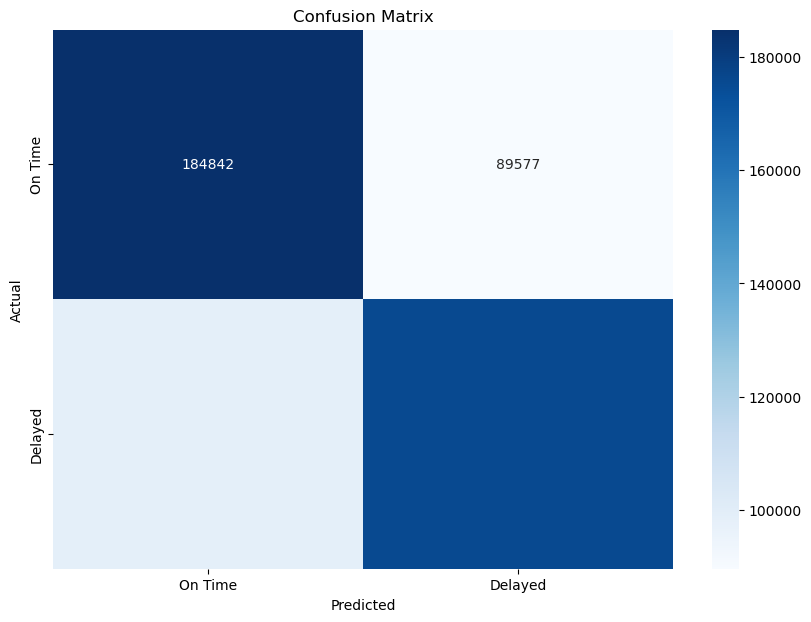

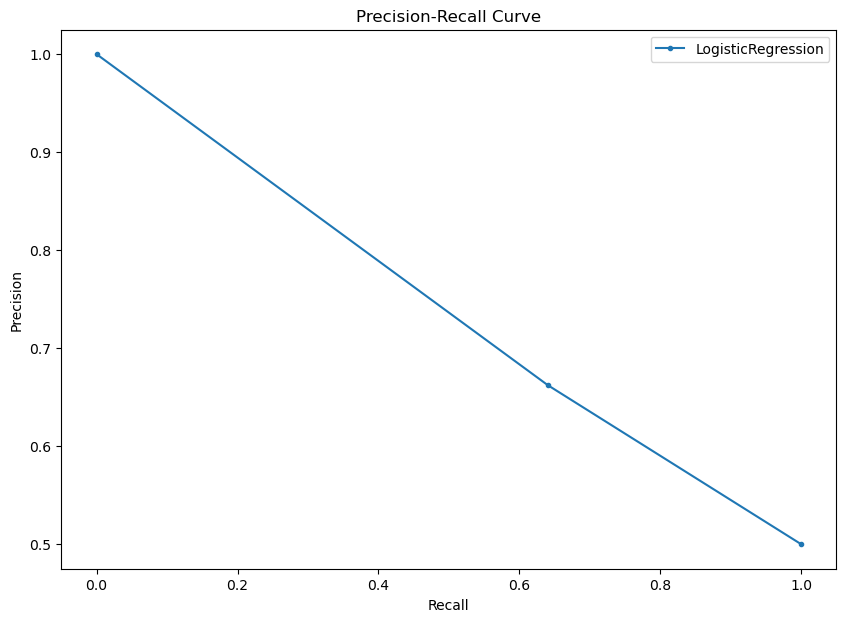

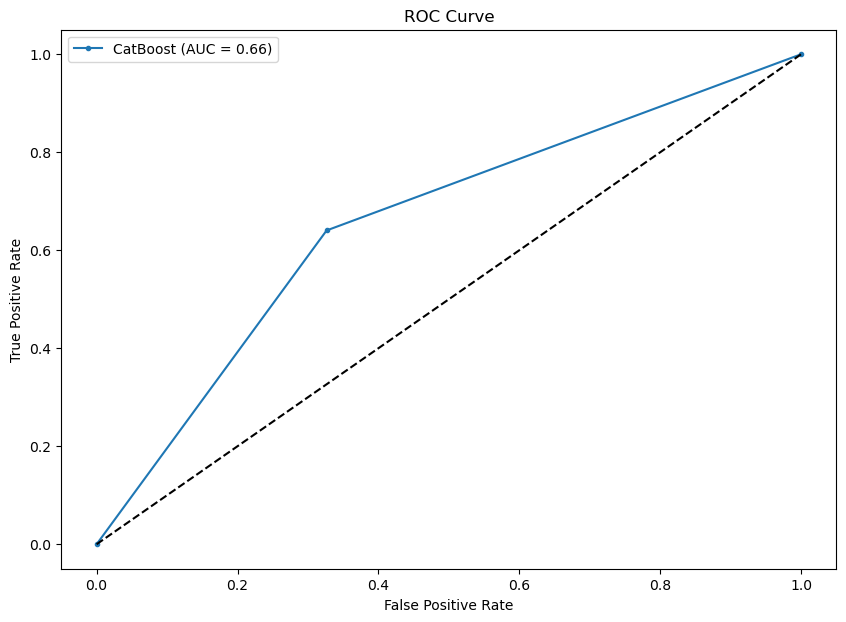

In [65]:
# Display metrics
print("Confusion Matrix:\n", cm_init)
print('\nTrue Positives(TP) = ', cm_init[0,0])
print('\nTrue Negatives(TN) = ', cm_init[1,1])
print('\nFalse Positives(FP) = ', cm_init[0,1])
print('\nFalse Negatives(FN) = ', cm_init[1,0])
print("\nAccuracy:", accuracy_init)
print("F1 Score:", f1_init)
print("ROC AUC Score:", roc_auc_init)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_init, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'], yticklabels=['On Time', 'Delayed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall_init, precision_init, marker='.', label='LogisticRegression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_init, tpr_init, marker='.', label='CatBoost (AUC = %0.2f)' % roc_auc_init)
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Key Observations**
- The model has an accuracy of **65.82%**, meaning it correctly classifies approximately **66%** of the instances
- The F1 score, which balances precision and recall, is approximately **65.22%**, indicating a moderate performance
- The ROC AUC score is about **65.82%**, suggesting that the model is somewhat capable of distinguishing between the two classes, but there's room for improvement
- The classification report indicates similar performance for both classes, with precision, recall, and F1 scores around **64-67%**

Overall, while the model shows some ability to classify the data, its performance metrics suggest that there is considerable room for improvement

## K-Fold Cross Validation

In [ ]:
# Defining k-Folds Cross Validation parameters
accuracies = cross_val_score(estimator = catboost,
                    X = x_preprocessed,
                    y = y,
                    scoring = 'accuracy',
                    cv = 10)

print("Accuracy: {:.3f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.3f}".format(accuracies.std()))

Learning rate set to 0.289409
0:	learn: 0.6779574	total: 111ms	remaining: 1m 51s
1:	learn: 0.6693520	total: 227ms	remaining: 1m 53s
2:	learn: 0.6637164	total: 352ms	remaining: 1m 57s
3:	learn: 0.6597890	total: 476ms	remaining: 1m 58s
4:	learn: 0.6567841	total: 600ms	remaining: 1m 59s
5:	learn: 0.6547454	total: 727ms	remaining: 2m
6:	learn: 0.6529902	total: 844ms	remaining: 1m 59s
7:	learn: 0.6514197	total: 963ms	remaining: 1m 59s
8:	learn: 0.6497752	total: 1.1s	remaining: 2m 1s
9:	learn: 0.6487510	total: 1.23s	remaining: 2m 2s
10:	learn: 0.6477354	total: 1.36s	remaining: 2m 2s
11:	learn: 0.6465905	total: 1.5s	remaining: 2m 3s
12:	learn: 0.6458484	total: 1.6s	remaining: 2m 1s
13:	learn: 0.6450529	total: 1.72s	remaining: 2m 1s
14:	learn: 0.6445033	total: 1.84s	remaining: 2m
15:	learn: 0.6439536	total: 1.96s	remaining: 2m
16:	learn: 0.6434388	total: 2.09s	remaining: 2m
17:	learn: 0.6427988	total: 2.21s	remaining: 2m
18:	learn: 0.6424344	total: 2.35s	remaining: 2m 1s
19:	learn: 0.6420567	t

**Accuracy**: The accuracy **65.885%** suggests that the model is correctly predicting the target variable approximately **66.0%** of the time. This accuracy will serve as a baseline to gauge improvement after hyperparameter tuning 

**Standard Deviation**: The standard deviation of **0.001 (or 0%)** indicates that the accuracy across different folds is consistent, suggesting that the model's performance is stable across the dataset split

## Hyperparameter Tuning

We already did this during the Model Creation phase. Let us use the following hyperparameters for this model: 

{'depth': 10, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.04}

## Model Optimization

In [73]:
# Initialize a logistic regression model with the best hyperparameters
best_params = {'depth': 10, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.04}
best_model = CatBoostClassifier(**best_params)

# Train the optimized model on the training data
best_model.fit(X_train, y_train)

82:	learn: 0.6413062	total: 11.1s	remaining: 2.27s
83:	learn: 0.6411857	total: 11.2s	remaining: 2.14s
84:	learn: 0.6410763	total: 11.3s	remaining: 2s
85:	learn: 0.6409052	total: 11.5s	remaining: 1.87s
86:	learn: 0.6408269	total: 11.6s	remaining: 1.74s
87:	learn: 0.6407192	total: 11.8s	remaining: 1.6s
88:	learn: 0.6405624	total: 11.9s	remaining: 1.47s
89:	learn: 0.6404345	total: 12s	remaining: 1.34s
90:	learn: 0.6403177	total: 12.2s	remaining: 1.2s
91:	learn: 0.6402106	total: 12.3s	remaining: 1.07s
92:	learn: 0.6400868	total: 12.4s	remaining: 936ms
93:	learn: 0.6399708	total: 12.6s	remaining: 802ms
94:	learn: 0.6398684	total: 12.7s	remaining: 669ms
95:	learn: 0.6397563	total: 12.8s	remaining: 535ms
96:	learn: 0.6396272	total: 13s	remaining: 401ms
97:	learn: 0.6395363	total: 13.1s	remaining: 267ms
98:	learn: 0.6394270	total: 13.2s	remaining: 134ms
99:	learn: 0.6393412	total: 13.4s	remaining: 0us


## Model Evaluation

In [75]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

# Generate classification report and confusion matrix (optional)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.635399330272102
Precision: 0.638002464163543
Recall: 0.6251778145767831
F1-score: 0.631525037167496
ROC-AUC: 0.6353945439243388

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.65      0.64    274419
           1       0.64      0.63      0.63    274162

    accuracy                           0.64    548581
   macro avg       0.64      0.64      0.64    548581
weighted avg       0.64      0.64      0.64    548581


Confusion Matrix:
[[177168  97251]
 [102762 171400]]


---

# Save model and preprocessor in pkl file to be used in a web app

## CatBoost

In [79]:
# Define categorical and numerical features
categorical_features = ['Carrier_Name', 'Dep_Time_Block_Group', 'Month']
numerical_features = ['Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 'Year', 'Day']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Redefine X (features) and y (target) variables
X = df_features[['Carrier_Name', 'Year', 'Month', 'Day', 'Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 
                'Dep_Time_Block_Group']]
y = df_features["delayed"]

# Apply the preprocessing pipeline to X
x_preprocessed = preprocessor.fit_transform(X)

In [80]:
# Split the data into training+validation and test sets (80% train_val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(x_preprocessed, y, test_size=0.2, random_state=42)

# Further split the training+validation set into training and validation sets (75% train, 25% val of train_val)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print(f'x_train_val shape: {X_train_val.shape}')
print(f'x_test shape: {X_test.shape}')
print(f'y_train_val shape: {y_train_val.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'x_train shape: {X_train.shape}')
print(f'x_val shape: {X_val.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')

x_train_val shape: (2194321, 37)
x_test shape: (548581, 37)
y_train_val shape: (2194321,)
y_test shape: (548581,)
x_train shape: (1645740, 37)
x_val shape: (548581, 37)
y_train shape: (1645740,)
y_val shape: (548581,)


In [81]:
# CatBoost model
catboost = CatBoostClassifier(random_state=42)

# Train and evaluate the model
catboost.fit(X_train, y_train)

Learning rate set to 0.2434
0:	learn: 0.6800963	total: 67.9ms	remaining: 1m 7s
1:	learn: 0.6720000	total: 141ms	remaining: 1m 10s
2:	learn: 0.6663508	total: 215ms	remaining: 1m 11s
3:	learn: 0.6627312	total: 294ms	remaining: 1m 13s
4:	learn: 0.6597410	total: 374ms	remaining: 1m 14s
5:	learn: 0.6574268	total: 455ms	remaining: 1m 15s
6:	learn: 0.6554064	total: 538ms	remaining: 1m 16s
7:	learn: 0.6538429	total: 613ms	remaining: 1m 15s
8:	learn: 0.6522863	total: 696ms	remaining: 1m 16s
9:	learn: 0.6511241	total: 778ms	remaining: 1m 17s
10:	learn: 0.6501285	total: 853ms	remaining: 1m 16s
11:	learn: 0.6488659	total: 933ms	remaining: 1m 16s
12:	learn: 0.6480677	total: 1.01s	remaining: 1m 16s
13:	learn: 0.6472936	total: 1.09s	remaining: 1m 16s
14:	learn: 0.6467484	total: 1.16s	remaining: 1m 16s
15:	learn: 0.6461925	total: 1.24s	remaining: 1m 16s
16:	learn: 0.6455996	total: 1.32s	remaining: 1m 16s
17:	learn: 0.6451902	total: 1.41s	remaining: 1m 16s
18:	learn: 0.6445310	total: 1.49s	remaining: 1

In [82]:
# Predict on the validation set and calculate classification report
y_val_pred = catboost.predict(X_val)
val_report = classification_report(y_val, y_val_pred)
print(val_report)

# Predict on the test set and calculate classification report
y_test_pred = catboost.predict(X_test)
test_report = classification_report(y_test, y_test_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.65      0.67      0.66    274289
           1       0.66      0.64      0.65    274292

    accuracy                           0.66    548581
   macro avg       0.66      0.66      0.66    548581
weighted avg       0.66      0.66      0.66    548581

              precision    recall  f1-score   support

           0       0.65      0.67      0.66    274419
           1       0.66      0.64      0.65    274162

    accuracy                           0.66    548581
   macro avg       0.66      0.66      0.66    548581
weighted avg       0.66      0.66      0.66    548581



In [83]:
# save model
dump(catboost, 'Model_Deploy_Olivia/flask/CatBoost/models/flight_model.pkl')
dump(catboost, 'Model_Deploy_Olivia/streamlit/CatBoost/models/flight_model.pkl')

['Model_Deploy_Olivia/streamlit/CatBoost/models/flight_model.pkl']

In [84]:
# Load the model from the file to ensure it was saved correctly
with open('Model_Deploy_Olivia/streamlit/CatBoost/models/flight_model.pkl', 'rb') as model_file:
    loaded_model = joblib.load(model_file)

# Test the loaded model with sample input
sample_input = x_preprocessed[:5]  
sample_prediction = loaded_model.predict(sample_input)
print("Sample predictions from the loaded model:", sample_prediction)

Sample predictions from the loaded model: [1 0 0 1 1]


---

# Web App Data Needed

This is to help grab the unique values of certain columns we would like to include in the web app

In [88]:
df_features.head(5)

,Carrier_Name,Dep_Time_Block_Group,Month,Year,Day,Scheduled_Arrival_Time,Scheduled_Departure_Time,delayed
0,United Air Lines Inc.,Afternoon,Sep,2023,5,2119,1743,0
1,Delta Air Lines Inc.,Afternoon,Mar,2024,29,1823,1710,0
2,American Airlines Inc.,Early Morning,Jun,2023,4,745,550,0
3,Delta Air Lines Inc.,Early Afternoon,Aug,2023,4,1459,1215,1
4,Southwest Airlines Co.,Evening,Apr,2023,18,2255,1955,1


In [89]:
df_features['Month'].unique()

array(['Sep', 'Mar', 'Jun', 'Aug', 'Apr', 'May', 'Dec', 'Jan', 'Feb',
       'Oct', 'Jul', 'Nov'], dtype=object)

In [90]:
df_webapp = pd.DataFrame(data=df_features[['Carrier_Name', 'Dep_Time_Block_Group', 'Scheduled_Arrival_Time', 'Scheduled_Departure_Time']])
df_webapp

,Carrier_Name,Dep_Time_Block_Group,Scheduled_Arrival_Time,Scheduled_Departure_Time
0,United Air Lines Inc.,Afternoon,2119,1743
1,Delta Air Lines Inc.,Afternoon,1823,1710
2,American Airlines Inc.,Early Morning,745,550
3,Delta Air Lines Inc.,Early Afternoon,1459,1215
4,Southwest Airlines Co.,Evening,2255,1955
...,...,...,...,...
2742897,SkyWest Airlines Inc.,Morning,1202,1044
2742898,Southwest Airlines Co.,Afternoon,1905,1620
2742899,Endeavor Air Inc.,Early Afternoon,1644,1300
2742900,Southwest Airlines Co.,Evening,115,2015


In [91]:
df_webapp['Carrier_Name'].unique()

array(['United Air Lines Inc.', 'Delta Air Lines Inc.',
       'American Airlines Inc.', 'Southwest Airlines Co.',
       'Allegiant Air', 'JetBlue Airways', 'PSA Airlines Inc.',
       'Endeavor Air Inc.', 'Alaska Airlines Inc.',
       'Frontier Airlines Inc.', 'Envoy Air', 'Hawaiian Airlines Inc.',
       'SkyWest Airlines Inc.', 'Republic Airline', 'Spirit Air Lines'],
      dtype=object)

In [92]:
df_webapp['Dep_Time_Block_Group'].unique()

array(['Afternoon', 'Early Morning', 'Early Afternoon', 'Evening',
       'Morning', 'Night'], dtype=object)

### Scheduled_Departure_Time

In [94]:
df_webapp['Scheduled_Departure_Time'].nunique()

1353

In [95]:
df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'United Air Lines Inc.')]

,Carrier_Name,Dep_Time_Block_Group,Scheduled_Arrival_Time,Scheduled_Departure_Time
86,United Air Lines Inc.,Early Morning,930,629
181,United Air Lines Inc.,Early Morning,1602,730
192,United Air Lines Inc.,Early Morning,1330,752
235,United Air Lines Inc.,Early Morning,841,500
238,United Air Lines Inc.,Early Morning,837,530
...,...,...,...,...
2742579,United Air Lines Inc.,Early Morning,759,602
2742590,United Air Lines Inc.,Early Morning,853,600
2742640,United Air Lines Inc.,Early Morning,925,735
2742731,United Air Lines Inc.,Early Morning,953,750


In [96]:
# United Air Lines Inc.
unitedEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'United Air Lines Inc.'), 'Scheduled_Departure_Time']
unitedMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'United Air Lines Inc.'), 'Scheduled_Departure_Time']
unitedEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'United Air Lines Inc.'), 'Scheduled_Departure_Time']
unitedAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'United Air Lines Inc.'), 'Scheduled_Departure_Time']
unitedEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'United Air Lines Inc.'), 'Scheduled_Departure_Time']
unitedNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'United Air Lines Inc.'), 'Scheduled_Departure_Time']

# Delta Air Lines Inc.
deltaEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Delta Air Lines Inc.'), 'Scheduled_Departure_Time']
deltaMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Delta Air Lines Inc.'), 'Scheduled_Departure_Time']
deltaEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Delta Air Lines Inc.'), 'Scheduled_Departure_Time']
deltaAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Delta Air Lines Inc.'), 'Scheduled_Departure_Time']
deltaEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Delta Air Lines Inc.'), 'Scheduled_Departure_Time']
deltaNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Delta Air Lines Inc.'), 'Scheduled_Departure_Time']

# American Airlines Inc.
americanEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'American Airlines Inc.'), 'Scheduled_Departure_Time']
americanMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'American Airlines Inc.'), 'Scheduled_Departure_Time']
americanEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'American Airlines Inc.'), 'Scheduled_Departure_Time']
americanAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'American Airlines Inc.'), 'Scheduled_Departure_Time']
americanEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'American Airlines Inc.'), 'Scheduled_Departure_Time']
americanNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'American Airlines Inc.'), 'Scheduled_Departure_Time']

# Southwest Airlines Co.
southwestEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Southwest Airlines Co.'), 'Scheduled_Departure_Time']
southwestMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Southwest Airlines Co.'), 'Scheduled_Departure_Time']
southwestEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Southwest Airlines Co.'), 'Scheduled_Departure_Time']
southwestAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Southwest Airlines Co.'), 'Scheduled_Departure_Time']
southwestEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Southwest Airlines Co.'), 'Scheduled_Departure_Time']
southwestNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Southwest Airlines Co.'), 'Scheduled_Departure_Time']

# Allegiant Air
allegiantEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Allegiant Air'), 'Scheduled_Departure_Time']
allegiantMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Allegiant Air'), 'Scheduled_Departure_Time']
allegiantEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Allegiant Air'), 'Scheduled_Departure_Time']
allegiantAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Allegiant Air'), 'Scheduled_Departure_Time']
allegiantEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Allegiant Air'), 'Scheduled_Departure_Time']
allegiantNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Allegiant Air'), 'Scheduled_Departure_Time']

# JetBlue Airways
jetblueEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'JetBlue Airways'), 'Scheduled_Departure_Time']
jetblueMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'JetBlue Airways'), 'Scheduled_Departure_Time']
jetblueEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'JetBlue Airways'), 'Scheduled_Departure_Time']
jetblueAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'JetBlue Airways'), 'Scheduled_Departure_Time']
jetblueEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'JetBlue Airways'), 'Scheduled_Departure_Time']
jetblueNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'JetBlue Airways'), 'Scheduled_Departure_Time']

# PSA Airlines Inc.
psaEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'PSA Airlines Inc.'), 'Scheduled_Departure_Time']
psaMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'PSA Airlines Inc.'), 'Scheduled_Departure_Time']
psaEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'PSA Airlines Inc.'), 'Scheduled_Departure_Time']
psaAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'PSA Airlines Inc.'), 'Scheduled_Departure_Time']
psaEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'PSA Airlines Inc.'), 'Scheduled_Departure_Time']
psaNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'PSA Airlines Inc.'), 'Scheduled_Departure_Time']

# Endeavor Air Inc.
endeavorEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Endeavor Air Inc.'), 'Scheduled_Departure_Time']
endeavorMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Endeavor Air Inc.'), 'Scheduled_Departure_Time']
endeavorEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Endeavor Air Inc.'), 'Scheduled_Departure_Time']
endeavorAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Endeavor Air Inc.'), 'Scheduled_Departure_Time']
endeavorEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Endeavor Air Inc.'), 'Scheduled_Departure_Time']
endeavorNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Endeavor Air Inc.'), 'Scheduled_Departure_Time']

# Alaska Airlines Inc.
alaskaEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Alaska Airlines Inc.'), 'Scheduled_Departure_Time']
alaskaMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Alaska Airlines Inc.'), 'Scheduled_Departure_Time']
alaskaEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Alaska Airlines Inc.'), 'Scheduled_Departure_Time']
alaskaAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Alaska Airlines Inc.'), 'Scheduled_Departure_Time']
alaskaEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Alaska Airlines Inc.'), 'Scheduled_Departure_Time']
alaskaNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Alaska Airlines Inc.'), 'Scheduled_Departure_Time']

# Frontier Airlines Inc.
frontierEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Frontier Airlines Inc.'), 'Scheduled_Departure_Time']
frontierMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Frontier Airlines Inc.'), 'Scheduled_Departure_Time']
frontierEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Frontier Airlines Inc.'), 'Scheduled_Departure_Time']
frontierAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Frontier Airlines Inc.'), 'Scheduled_Departure_Time']
frontierEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Frontier Airlines Inc.'), 'Scheduled_Departure_Time']
frontierNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Frontier Airlines Inc.'), 'Scheduled_Departure_Time']

# Envoy Air
envoyEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Envoy Air'), 'Scheduled_Departure_Time']
envoyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Envoy Air'), 'Scheduled_Departure_Time']
envoyEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Envoy Air'), 'Scheduled_Departure_Time']
envoyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Envoy Air'), 'Scheduled_Departure_Time']
envoyEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Envoy Air'), 'Scheduled_Departure_Time']
envoyNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Envoy Air'), 'Scheduled_Departure_Time']

# Hawaiian Airlines Inc.
hawaiianEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Hawaiian Airlines Inc.'), 'Scheduled_Departure_Time']
hawaiianMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Hawaiian Airlines Inc.'), 'Scheduled_Departure_Time']
hawaiianEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Hawaiian Airlines Inc.'), 'Scheduled_Departure_Time']
hawaiianAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Hawaiian Airlines Inc.'), 'Scheduled_Departure_Time']
hawaiianEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Hawaiian Airlines Inc.'), 'Scheduled_Departure_Time']
hawaiianNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Hawaiian Airlines Inc.'), 'Scheduled_Departure_Time']

# SkyWest Airlines Inc.
skywestEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'SkyWest Airlines Inc.'), 'Scheduled_Departure_Time']
skywestMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'SkyWest Airlines Inc.'), 'Scheduled_Departure_Time']
skywestEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'SkyWest Airlines Inc.'), 'Scheduled_Departure_Time']
skywestAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'SkyWest Airlines Inc.'), 'Scheduled_Departure_Time']
skywestEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'SkyWest Airlines Inc.'), 'Scheduled_Departure_Time']
skywestNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'SkyWest Airlines Inc.'), 'Scheduled_Departure_Time']

# Republic Airline
republicEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Republic Airline'), 'Scheduled_Departure_Time']
republicMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Republic Airline'), 'Scheduled_Departure_Time']
republicEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Republic Airline'), 'Scheduled_Departure_Time']
republicAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Republic Airline'), 'Scheduled_Departure_Time']
republicEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Republic Airline'), 'Scheduled_Departure_Time']
republicNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Republic Airline'), 'Scheduled_Departure_Time']

# Spirit Air Lines
spiritEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Spirit Air Lines'), 'Scheduled_Departure_Time']
spiritMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Spirit Air Lines'), 'Scheduled_Departure_Time']
spiritEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Spirit Air Lines'), 'Scheduled_Departure_Time']
spiritAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Spirit Air Lines'), 'Scheduled_Departure_Time']
spiritEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Spirit Air Lines'), 'Scheduled_Departure_Time']
spiritNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Spirit Air Lines'), 'Scheduled_Departure_Time']

In [97]:
# United Air Lines Inc. Array
unitedEarlyMorningArr   = unitedEarlyMorning.unique()
unitedMorningArr        = unitedMorning.unique()
unitedEarlyAfternoonArr = unitedEarlyAfternoon.unique()
unitedAfternoonArr      = unitedAfternoon.unique()
unitedEveningArr        = unitedEvening.unique()
unitedNightArr          = unitedNight.unique()

# Delta Air Lines Inc. Array
deltaEarlyMorningArr   = deltaEarlyMorning.unique()
deltaMorningArr        = deltaMorning.unique()
deltaEarlyAfternoonArr = deltaEarlyAfternoon.unique()
deltaAfternoonArr      = deltaAfternoon.unique()
deltaEveningArr        = deltaEvening.unique()
deltaNightArr          = deltaNight.unique()

# American Airlines Inc. Array 
americanEarlyMorningArr   = americanEarlyMorning.unique()
americanMorningArr        = americanMorning.unique()
americanEarlyAfternoonArr = americanEarlyAfternoon.unique()
americanAfternoonArr      = americanAfternoon.unique()
americanEveningArr        = americanEvening.unique()
americanNightArr          = americanNight.unique()

# Southwest Airlines Co. Array
southwestEarlyMorningArr   = southwestEarlyMorning.unique()
southwestMorningArr        = southwestMorning.unique()
southwestEarlyAfternoonArr = southwestEarlyAfternoon.unique()
southwestAfternoonArr      = southwestAfternoon.unique()
southwestEveningArr        = southwestEvening.unique()
southwestNightArr          = southwestNight.unique()

# Allegiant Air Array
allegiantEarlyMorningArr   = allegiantEarlyMorning.unique()
allegiantMorningArr        = allegiantMorning.unique()
allegiantEarlyAfternoonArr = allegiantEarlyAfternoon.unique()
allegiantAfternoonArr      = allegiantAfternoon.unique()
allegiantEveningArr        = allegiantEvening.unique()
allegiantNightArr          = allegiantNight.unique()

# JetBlue Airways Array
jetblueEarlyMorningArr   = jetblueEarlyMorning.unique()
jetblueMorningArr        = jetblueMorning.unique()
jetblueEarlyAfternoonArr = jetblueEarlyAfternoon.unique()
jetblueAfternoonArr      = jetblueAfternoon.unique()
jetblueEveningArr        = jetblueEvening.unique()
jetblueNightArr          = jetblueNight.unique()

# PSA Airlines Inc.Array
psaEarlyMorningArr   = psaEarlyMorning.unique()
psaMorningArr        = psaMorning.unique()
psaEarlyAfternoonArr = psaEarlyAfternoon.unique()
psaAfternoonArr      = psaAfternoon.unique()
psaEveningArr        = psaEvening.unique()
psaNightArr          = psaNight.unique()

# Endeavor Air Inc. Array
endeavorEarlyMorningArr   = endeavorEarlyMorning.unique()
endeavorMorningArr        = endeavorMorning.unique()
endeavorEarlyAfternoonArr = endeavorEarlyAfternoon.unique()
endeavorAfternoonArr      = endeavorAfternoon.unique()
endeavorEveningArr        = endeavorEvening.unique()
endeavorNightArr          = endeavorNight.unique()

# Alaska Airlines Inc. Array
alaskaEarlyMorningArr   = alaskaEarlyMorning.unique()
alaskaMorningArr        = alaskaMorning.unique()
alaskaEarlyAfternoonArr = alaskaEarlyAfternoon.unique()
alaskaAfternoonArr      = alaskaAfternoon.unique()
alaskaEveningArr        = alaskaEvening.unique()
alaskaNightArr          = alaskaNight.unique()

# Frontier Airlines Inc. Array
frontierEarlyMorningArr   = frontierEarlyMorning.unique()
frontierMorningArr        = frontierMorning.unique()
frontierEarlyAfternoonArr = frontierEarlyAfternoon.unique()
frontierAfternoonArr      = frontierAfternoon.unique()
frontierEveningArr        = frontierEvening.unique()
frontierNightArr          = frontierNight.unique()

# Envoy Air Array
envoyEarlyMorningArr   = envoyEarlyMorning.unique()
envoyMorningArr        = envoyMorning.unique()
envoyEarlyAfternoonArr = envoyEarlyAfternoon.unique()
envoyAfternoonArr      = envoyAfternoon.unique()
envoyEveningArr        = envoyEvening.unique()
envoyNightArr          = envoyNight.unique()

# Hawaiian Airlines Inc. Array
hawaiianEarlyMorningArr   = hawaiianEarlyMorning.unique()
hawaiianMorningArr        = hawaiianMorning.unique()
hawaiianEarlyAfternoonArr = hawaiianEarlyAfternoon.unique()
hawaiianAfternoonArr      = hawaiianAfternoon.unique()
hawaiianEveningArr        = hawaiianEvening.unique()
hawaiianNightArr          = hawaiianNight.unique()

# SkyWest Airlines Inc. Array
skywestEarlyMorningArr   = skywestEarlyMorning.unique()
skywestMorningArr        = skywestMorning.unique()
skywestEarlyAfternoonArr = skywestEarlyAfternoon.unique()
skywestAfternoonArr      = skywestAfternoon.unique()
skywestEveningArr        = skywestEvening.unique()
skywestNightArr          = skywestNight.unique()

# Republic Airline Array
republicEarlyMorningArr   = republicEarlyMorning.unique()
republicMorningArr        = republicMorning.unique()
republicEarlyAfternoonArr = republicEarlyAfternoon.unique()
republicAfternoonArr      = republicAfternoon.unique()
republicEveningArr        = republicEvening.unique()
republicNightArr          = republicNight.unique()

# Spirit Air Lines Array
spiritEarlyMorningArr   = spiritEarlyMorning.unique()
spiritMorningArr        = spiritMorning.unique()
spiritEarlyAfternoonArr = spiritEarlyAfternoon.unique()
spiritAfternoonArr      = spiritAfternoon.unique()
spiritEveningArr        = spiritEvening.unique() 
spiritNightArr          = spiritNight.unique() 

In [98]:
unitedEarlyMorningArr

array([629, 730, 752, 500, 530, 710, 720, 105, 625, 630, 645, 700, 741,
       515, 736, 733, 715, 734, 620, 619, 706, 740, 545, 602, 600, 537,
       745, 744, 738, 728, 747, 721, 607, 640, 631, 713, 701, 510, 610,
       704, 615, 652, 725, 605,  55, 750, 755, 553, 519, 739, 650, 643,
       754, 525, 604, 601, 735, 709, 651, 727, 748, 757, 618, 508, 737,
       711, 746, 731, 705, 716, 550, 603, 626, 513, 714, 707, 702, 639,
       608, 635, 724, 658,  51, 753, 621,  20, 722, 632, 742, 546, 505,
       520,  57, 655,  58, 506, 540,  15, 729,  35, 523, 719,  29, 636,
       534, 703, 759, 633, 758, 507, 708, 628, 717, 205,  59, 623, 616,
       535, 659, 648, 726,  48, 749, 539, 723,  40, 751, 743, 756, 732,
       549, 518, 712, 611, 646, 649, 637, 612, 622, 627, 514, 511, 521,
       502, 638, 614, 606, 109, 634, 100, 524, 653,  45,  25, 613, 531,
       543, 624, 718, 609, 544, 642, 654, 641, 555,  50,   9,   6, 542,
       501, 647,  44, 617, 644, 541, 657,  53, 533, 557, 528,  3

In [99]:
unitedEarlyMorningArr.shape

(214,)

In [100]:
min(unitedEarlyMorningArr)

4

In [101]:
max(unitedEarlyMorningArr)

759

In [102]:
# Enclose each value in quotes using List Comprehension

# United Air Lines Inc. list
unitedEarlyMorningList   = [f'{time}' for time in unitedEarlyMorningArr]
unitedMorningList        = [f'{time}' for time in unitedMorningArr]
unitedEarlyAfternoonList = [f'{time}' for time in unitedEarlyAfternoonArr]
unitedAfternoonList      = [f'{time}' for time in unitedAfternoonArr]
unitedEveningList        = [f'{time}' for time in unitedEveningArr]
unitedNightList          = [f'{time}' for time in unitedNightArr]

# Delta Air Lines Inc. List
deltaEarlyMorningList   = [f'{time}' for time in deltaEarlyMorningArr]
deltaMorningList        = [f'{time}' for time in deltaMorningArr]
deltaEarlyAfternoonList = [f'{time}' for time in deltaEarlyAfternoonArr]
deltaAfternoonList      = [f'{time}' for time in deltaAfternoonArr]
deltaEveningList        = [f'{time}' for time in deltaEveningArr]
deltaNightList          = [f'{time}' for time in deltaNightArr]

# American Airlines Inc. List 
americanEarlyMorningList   = [f'{time}' for time in americanEarlyMorningArr]
americanMorningList        = [f'{time}' for time in americanMorningArr]
americanEarlyAfternoonList = [f'{time}' for time in americanEarlyAfternoonArr]
americanAfternoonList      = [f'{time}' for time in americanAfternoonArr]
americanEveningList        = [f'{time}' for time in americanEveningArr]
americanNightList          = [f'{time}' for time in americanNightArr]

# Southwest Airlines Co. List
southwestEarlyMorningList   = [f'{time}' for time in southwestEarlyMorningArr]
southwestMorningList        = [f'{time}' for time in southwestMorningArr]
southwestEarlyAfternoonList = [f'{time}' for time in southwestEarlyAfternoonArr]
southwestAfternoonList      = [f'{time}' for time in southwestAfternoonArr]
southwestEveningList        = [f'{time}' for time in southwestEveningArr]
southwestNightList          = [f'{time}' for time in southwestNightArr]

# Allegiant Air List
allegiantEarlyMorningList   = [f'{time}' for time in allegiantEarlyMorningArr]
allegiantMorningList        = [f'{time}' for time in allegiantMorningArr]
allegiantEarlyAfternoonList = [f'{time}' for time in allegiantEarlyAfternoonArr]
allegiantAfternoonList      = [f'{time}' for time in allegiantAfternoonArr]
allegiantEveningList        = [f'{time}' for time in allegiantEveningArr]
allegiantNightList          = [f'{time}' for time in allegiantNightArr]

# JetBlue Airways List
jetblueEarlyMorningList   = [f'{time}' for time in jetblueEarlyMorningArr]
jetblueMorningList        = [f'{time}' for time in jetblueMorningArr]
jetblueEarlyAfternoonList = [f'{time}' for time in jetblueEarlyAfternoonArr]
jetblueAfternoonList      = [f'{time}' for time in jetblueAfternoonArr]
jetblueEveningList        = [f'{time}' for time in jetblueEveningArr]
jetblueNightList          = [f'{time}' for time in jetblueNightArr]

# PSA Airlines Inc.List
psaEarlyMorningList   = [f'{time}' for time in psaEarlyMorningArr]
psaMorningList        = [f'{time}' for time in psaMorningArr]
psaEarlyAfternoonList = [f'{time}' for time in psaEarlyAfternoonArr]
psaAfternoonList      = [f'{time}' for time in psaAfternoonArr]
psaEveningList        = [f'{time}' for time in psaEveningArr]
psaNightList          = [f'{time}' for time in psaNightArr]

# Endeavor Air Inc. List
endeavorEarlyMorningList   = [f'{time}' for time in endeavorEarlyMorningArr]
endeavorMorningList        = [f'{time}' for time in endeavorMorningArr]
endeavorEarlyAfternoonList = [f'{time}' for time in endeavorEarlyAfternoonArr]
endeavorAfternoonList      = [f'{time}' for time in endeavorAfternoonArr]
endeavorEveningList        = [f'{time}' for time in endeavorEveningArr]
endeavorNightList          = [f'{time}' for time in endeavorNightArr]

# Alaska Airlines Inc. List
alaskaEarlyMorningList   = [f'{time}' for time in alaskaEarlyMorningArr]
alaskaMorningList        = [f'{time}' for time in alaskaMorningArr]
alaskaEarlyAfternoonList = [f'{time}' for time in alaskaEarlyAfternoonArr]
alaskaAfternoonList      = [f'{time}' for time in alaskaAfternoonArr]
alaskaEveningList        = [f'{time}' for time in alaskaEveningArr]
alaskaNightList          = [f'{time}' for time in alaskaNightArr]

# Frontier Airlines Inc. List
frontierEarlyMorningList   = [f'{time}' for time in frontierEarlyMorningArr]
frontierMorningList        = [f'{time}' for time in frontierMorningArr]
frontierEarlyAfternoonList = [f'{time}' for time in frontierEarlyAfternoonArr]
frontierAfternoonList      = [f'{time}' for time in frontierAfternoonArr]
frontierEveningList        = [f'{time}' for time in frontierEveningArr]
frontierNightList          = [f'{time}' for time in frontierNightArr]

# Envoy Air List
envoyEarlyMorningList   = [f'{time}' for time in envoyEarlyMorningArr]
envoyMorningList        = [f'{time}' for time in envoyMorningArr]
envoyEarlyAfternoonList = [f'{time}' for time in envoyEarlyAfternoonArr]
envoyAfternoonList      = [f'{time}' for time in envoyAfternoonArr]
envoyEveningList        = [f'{time}' for time in envoyEveningArr]
envoyNightList          = [f'{time}' for time in envoyNightArr]

# Hawaiian Airlines Inc. List
hawaiianEarlyMorningList   = [f'{time}' for time in hawaiianEarlyMorningArr]
hawaiianMorningList        = [f'{time}' for time in hawaiianMorningArr]
hawaiianEarlyAfternoonList = [f'{time}' for time in hawaiianEarlyAfternoonArr]
hawaiianAfternoonList      = [f'{time}' for time in hawaiianAfternoonArr]
hawaiianEveningList        = [f'{time}' for time in hawaiianEveningArr]
hawaiianNightList          = [f'{time}' for time in hawaiianNightArr]

# SkyWest Airlines Inc. List
skywestEarlyMorningList   = [f'{time}' for time in skywestEarlyMorningArr]
skywestMorningList        = [f'{time}' for time in skywestMorningArr]
skywestEarlyAfternoonList = [f'{time}' for time in skywestEarlyAfternoonArr]
skywestAfternoonList      = [f'{time}' for time in skywestAfternoonArr]
skywestEveningList        = [f'{time}' for time in skywestEveningArr]
skywestNightList          = [f'{time}' for time in skywestNightArr]

# Republic Airline List
republicEarlyMorningList   = [f'{time}' for time in republicEarlyMorningArr]
republicMorningList        = [f'{time}' for time in republicMorningArr]
republicEarlyAfternoonList = [f'{time}' for time in republicEarlyAfternoonArr]
republicAfternoonList      = [f'{time}' for time in republicAfternoonArr]
republicEveningList        = [f'{time}' for time in republicEveningArr]
republicNightList          = [f'{time}' for time in republicNightArr]

# Spirit Air Lines List
spiritEarlyMorningList   = [f'{time}' for time in spiritEarlyMorningArr]
spiritMorningList        = [f'{time}' for time in spiritMorningArr]
spiritEarlyAfternoonList = [f'{time}' for time in spiritEarlyAfternoonArr]
spiritAfternoonList      = [f'{time}' for time in spiritAfternoonArr]
spiritEveningList        = [f'{time}' for time in spiritEveningArr]
spiritNightList          = [f'{time}' for time in spiritNightArr]

In [103]:
unitedEarlyMorningList

['629',
 '730',
 '752',
 '500',
 '530',
 '710',
 '720',
 '105',
 '625',
 '630',
 '645',
 '700',
 '741',
 '515',
 '736',
 '733',
 '715',
 '734',
 '620',
 '619',
 '706',
 '740',
 '545',
 '602',
 '600',
 '537',
 '745',
 '744',
 '738',
 '728',
 '747',
 '721',
 '607',
 '640',
 '631',
 '713',
 '701',
 '510',
 '610',
 '704',
 '615',
 '652',
 '725',
 '605',
 '55',
 '750',
 '755',
 '553',
 '519',
 '739',
 '650',
 '643',
 '754',
 '525',
 '604',
 '601',
 '735',
 '709',
 '651',
 '727',
 '748',
 '757',
 '618',
 '508',
 '737',
 '711',
 '746',
 '731',
 '705',
 '716',
 '550',
 '603',
 '626',
 '513',
 '714',
 '707',
 '702',
 '639',
 '608',
 '635',
 '724',
 '658',
 '51',
 '753',
 '621',
 '20',
 '722',
 '632',
 '742',
 '546',
 '505',
 '520',
 '57',
 '655',
 '58',
 '506',
 '540',
 '15',
 '729',
 '35',
 '523',
 '719',
 '29',
 '636',
 '534',
 '703',
 '759',
 '633',
 '758',
 '507',
 '708',
 '628',
 '717',
 '205',
 '59',
 '623',
 '616',
 '535',
 '659',
 '648',
 '726',
 '48',
 '749',
 '539',
 '723',
 '40',
 '7

In [104]:
# Converting list to back into an array for final output 

# United Air Lines Inc. 
unitedEarlyMorning   = np.asarray(unitedEarlyMorningList)
unitedMorning        = np.asarray(unitedMorningList)
unitedEarlyAfternoon = np.asarray(unitedEarlyAfternoonList)
unitedAfternoon      = np.asarray(unitedAfternoonList)
unitedEvening        = np.asarray(unitedEveningList)
unitedNight          = np.asarray(unitedNightList)

# Delta Air Lines Inc.
deltaEarlyMorning   = np.asarray(deltaEarlyMorningList)
deltaMorning        = np.asarray(deltaMorningList)
deltaEarlyAfternoon = np.asarray(deltaEarlyAfternoonList)
deltaAfternoon      = np.asarray(deltaAfternoonList)
deltaEvening        = np.asarray(deltaEveningList)
deltaNight          = np.asarray(deltaNightList)

# American Airlines Inc. 
americanEarlyMorning   = np.asarray(americanEarlyMorningList)
americanMorning        = np.asarray(americanMorningList)
americanEarlyAfternoon = np.asarray(americanEarlyAfternoonList)
americanAfternoon      = np.asarray(americanAfternoonList)
americanEvening        = np.asarray(americanEveningList)
americanNight          = np.asarray(americanNightList)

# Southwest Airlines Co. 
southwestEarlyMorning   = np.asarray(southwestEarlyMorningList)
southwestMorning        = np.asarray(southwestMorningList)
southwestEarlyAfternoon = np.asarray(southwestEarlyAfternoonList)
southwestAfternoon      = np.asarray(southwestAfternoonList)
southwestEvening        = np.asarray(southwestEveningList)
southwestNight          = np.asarray(southwestNightList)

# Allegiant Air 
allegiantEarlyMorning   = np.asarray(allegiantEarlyMorningList)
allegiantMorning        = np.asarray(allegiantMorningList)
allegiantEarlyAfternoon = np.asarray(allegiantEarlyAfternoonList)
allegiantAfternoon      = np.asarray(allegiantAfternoonList)
allegiantEvening        = np.asarray(allegiantEveningList)
allegiantNight          = np.asarray(allegiantNightList)

# JetBlue Airways 
jetblueEarlyMorning   = np.asarray(jetblueEarlyMorningList)
jetblueMorning        = np.asarray(jetblueMorningList)
jetblueEarlyAfternoon = np.asarray(jetblueEarlyAfternoonList)
jetblueAfternoon      = np.asarray(jetblueAfternoonList)
jetblueEvening        = np.asarray(jetblueEveningList)
jetblueNight          = np.asarray(jetblueNightList)

# PSA Airlines Inc.
psaEarlyMorning   = np.asarray(psaEarlyMorningList)
psaMorning        = np.asarray(psaMorningList)
psaEarlyAfternoon = np.asarray(psaEarlyAfternoonList)
psaAfternoon      = np.asarray(psaAfternoonList)
psaEvening        = np.asarray(psaEveningList)
psaNight          = np.asarray(psaNightList)

# Endeavor Air Inc.
endeavorEarlyMorning   = np.asarray(endeavorEarlyMorningList)
endeavorMorning        = np.asarray(endeavorMorningList)
endeavorEarlyAfternoon = np.asarray(endeavorEarlyAfternoonList)
endeavorAfternoon      = np.asarray(endeavorAfternoonList)
endeavorEvening        = np.asarray(endeavorEveningList)
endeavorNight          = np.asarray(endeavorNightList)

# Alaska Airlines Inc. 
alaskaEarlyMorning   = np.asarray(alaskaEarlyMorningList)
alaskaMorning        = np.asarray(alaskaMorningList)
alaskaEarlyAfternoon = np.asarray(alaskaEarlyAfternoonList)
alaskaAfternoon      = np.asarray(alaskaAfternoonList)
alaskaEvening        = np.asarray(alaskaEveningList)
alaskaNight          = np.asarray(alaskaNightList)

# Frontier Airlines Inc. 
frontierEarlyMorning   = np.asarray(frontierEarlyMorningList)
frontierMorning        = np.asarray(frontierMorningList)
frontierEarlyAfternoon = np.asarray(frontierEarlyAfternoonList)
frontierAfternoon      = np.asarray(frontierAfternoonList)
frontierEvening        = np.asarray(frontierEveningList)
frontierNight          = np.asarray(frontierNightList)

# Envoy Air 
envoyEarlyMorning   = np.asarray(envoyEarlyMorningList)
envoyMorning        = np.asarray(envoyMorningList)
envoyEarlyAfternoon = np.asarray(envoyEarlyAfternoonList)
envoyAfternoon      = np.asarray(envoyAfternoonList)
envoyEvening        = np.asarray(envoyEveningList)
envoyNight          = np.asarray(envoyNightList)

# Hawaiian Airlines Inc. 
hawaiianEarlyMorning   = np.asarray(hawaiianEarlyMorningList)
hawaiianMorning        = np.asarray(hawaiianMorningList)
hawaiianEarlyAfternoon = np.asarray(hawaiianEarlyAfternoonList)
hawaiianAfternoon      = np.asarray(hawaiianAfternoonList)
hawaiianEvening        = np.asarray(hawaiianEveningList)
hawaiianNight          = np.asarray(hawaiianNightList)

# SkyWest Airlines Inc.
skywestEarlyMorning   = np.asarray(skywestEarlyMorningList)
skywestMorning        = np.asarray(skywestMorningList)
skywestEarlyAfternoon = np.asarray(skywestEarlyAfternoonList)
skywestAfternoon      = np.asarray(skywestAfternoonList)
skywestEvening        = np.asarray(skywestEveningList)
skywestNight          = np.asarray(skywestNightList)

# Republic Airline 
republicEarlyMorning   = np.asarray(republicEarlyMorningList)
republicMorning        = np.asarray(republicMorningList)
republicEarlyAfternoon = np.asarray(republicEarlyAfternoonList)
republicAfternoon      = np.asarray(republicAfternoonList)
republicEvening        = np.asarray(republicEveningList)
republicNight          = np.asarray(republicNightList)

# Spirit Air Lines
spiritEarlyMorning   = np.asarray(spiritEarlyMorningList)
spiritMorning        = np.asarray(spiritMorningList)
spiritEarlyAfternoon = np.asarray(spiritEarlyAfternoonList)
spiritAfternoon      = np.asarray(spiritAfternoonList)
spiritEvening        = np.asarray(spiritEveningList)
spiritNight          = np.asarray(spiritNightList)

In [105]:
# Print the results 
class style:
   BOLD = '\033[1m'
   END = '\033[0m'

print('United Air Lines Inc.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(unitedEarlyMorning))
print(unitedEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(unitedMorning))
print(unitedMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(unitedEarlyAfternoon))
print(unitedEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(unitedAfternoon))
print(unitedAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(unitedEvening))
print(unitedEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(unitedNight))
print(unitedNight.shape)

print('\nDelta Air Lines Inc.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(deltaEarlyMorning))
print(deltaEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(deltaMorning))
print(deltaMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(deltaEarlyAfternoon))
print(deltaEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(deltaAfternoon))
print(deltaAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(deltaEvening))
print(deltaEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(deltaNight))
print(deltaNight.shape)

print('\nAmerican Airlines Inc.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(americanEarlyMorning))
print(americanEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(americanMorning))
print(americanMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(americanEarlyAfternoon))
print(americanEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(americanAfternoon))
print(americanAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(americanEvening))
print(americanEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(americanNight))
print(americanNight.shape)

print('\nSouthwest Airlines Co.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(southwestEarlyMorning))
print(southwestEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(southwestMorning))
print(southwestMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(southwestEarlyAfternoon))
print(southwestEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(southwestAfternoon))
print(southwestAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(southwestEvening))
print(southwestEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(southwestNight))
print(southwestNight.shape)

print('\nAllegiant Air')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(allegiantEarlyMorning))
print(allegiantEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(allegiantMorning))
print(allegiantMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(allegiantEarlyAfternoon))
print(allegiantEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(allegiantAfternoon))
print(allegiantAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(allegiantEvening))
print(allegiantEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(allegiantNight))
print(allegiantNight.shape)

print('\nJetBlue Airways')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(jetblueEarlyMorning))
print(jetblueEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(jetblueMorning))
print(jetblueMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(jetblueEarlyAfternoon))
print(jetblueEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(jetblueAfternoon))
print(jetblueAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(jetblueEvening))
print(jetblueEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(jetblueNight))
print(jetblueNight.shape)

print('\nPSA Airlines Inc.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(psaEarlyMorning))
print(psaEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(psaMorning))
print(psaMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(psaEarlyAfternoon))
print(psaEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(psaAfternoon))
print(psaAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(psaEvening))
print(psaEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(psaNight))
print(psaNight.shape)

print('\nEndeavor Air Inc.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(endeavorEarlyMorning))
print(endeavorEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(endeavorMorning))
print(endeavorMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(endeavorEarlyAfternoon))
print(endeavorEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(endeavorAfternoon))
print(endeavorAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(endeavorEvening))
print(endeavorEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(endeavorNight))
print(endeavorNight.shape)

print('\nAlaska Airlines Inc.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(alaskaEarlyMorning))
print(alaskaEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(alaskaMorning))
print(alaskaMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(alaskaEarlyAfternoon))
print(alaskaEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(alaskaAfternoon))
print(alaskaAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(alaskaEvening))
print(alaskaEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(alaskaNight))
print(alaskaNight.shape)

print('\nFrontier Airlines Inc.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(frontierEarlyMorning))
print(frontierEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(frontierMorning))
print(frontierMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(frontierEarlyAfternoon))
print(frontierEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(frontierAfternoon))
print(frontierAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(frontierEvening))
print(frontierEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(frontierNight))
print(frontierNight.shape)

print('\nEnvoy Air')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(envoyEarlyMorning))
print(envoyEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(envoyMorning))
print(envoyMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(envoyEarlyAfternoon))
print(envoyEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(envoyAfternoon))
print(envoyAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(envoyEvening))
print(envoyEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(envoyNight))
print(envoyNight.shape)

print('\nHawaiian Airlines Inc.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(hawaiianEarlyMorning))
print(hawaiianEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(hawaiianMorning))
print(hawaiianMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(hawaiianEarlyAfternoon))
print(hawaiianEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(hawaiianAfternoon))
print(hawaiianAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(hawaiianEvening))
print(hawaiianEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(hawaiianNight))
print(hawaiianNight.shape)

print('\nSkyWest Airlines Inc.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(skywestEarlyMorning))
print(skywestEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(skywestMorning))
print(skywestMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(skywestEarlyAfternoon))
print(skywestEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(skywestAfternoon))
print(skywestAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(skywestEvening))
print(skywestEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(skywestNight))
print(skywestNight.shape)

print('\nRepublic Airline')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(republicEarlyMorning))
print(republicEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(republicMorning))
print(republicMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(republicEarlyAfternoon))
print(republicEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(republicAfternoon))
print(republicAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(republicEvening))
print(republicEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(republicNight))
print(republicNight.shape)

print('\nSpirit Air Lines')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(spiritEarlyMorning))
print(spiritEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(spiritMorning))
print(spiritMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(spiritEarlyAfternoon))
print(spiritEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(spiritAfternoon))
print(spiritAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(spiritEvening))
print(spiritEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(spiritNight))
print(spiritNight.shape)

United Air Lines Inc.
--------------------------------
Early Morning
array(['629', '730', '752', '500', '530', '710', '720', '105', '625',
       '630', '645', '700', '741', '515', '736', '733', '715', '734',
       '620', '619', '706', '740', '545', '602', '600', '537', '745',
       '744', '738', '728', '747', '721', '607', '640', '631', '713',
       '701', '510', '610', '704', '615', '652', '725', '605', '55',
       '750', '755', '553', '519', '739', '650', '643', '754', '525',
       '604', '601', '735', '709', '651', '727', '748', '757', '618',
       '508', '737', '711', '746', '731', '705', '716', '550', '603',
       '626', '513', '714', '707', '702', '639', '608', '635', '724',
       '658', '51', '753', '621', '20', '722', '632', '742', '546', '505',
       '520', '57', '655', '58', '506', '540', '15', '729', '35', '523',
       '719', '29', '636', '534', '703', '759', '633', '758', '507',
       '708', '628', '717', '205', '59', '623', '616', '535', '659',
       '648', '7

### Scheduled_Arrival_Time

In [107]:
df_webapp['Scheduled_Arrival_Time'].nunique()

1427

In [108]:
df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'United Air Lines Inc.')]

,Carrier_Name,Dep_Time_Block_Group,Scheduled_Arrival_Time,Scheduled_Departure_Time
86,United Air Lines Inc.,Early Morning,930,629
181,United Air Lines Inc.,Early Morning,1602,730
192,United Air Lines Inc.,Early Morning,1330,752
235,United Air Lines Inc.,Early Morning,841,500
238,United Air Lines Inc.,Early Morning,837,530
...,...,...,...,...
2742579,United Air Lines Inc.,Early Morning,759,602
2742590,United Air Lines Inc.,Early Morning,853,600
2742640,United Air Lines Inc.,Early Morning,925,735
2742731,United Air Lines Inc.,Early Morning,953,750


In [109]:
# United Air Lines Inc.
unitedEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'United Air Lines Inc.'), 'Scheduled_Arrival_Time']
unitedMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'United Air Lines Inc.'), 'Scheduled_Arrival_Time']
unitedEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'United Air Lines Inc.'), 'Scheduled_Arrival_Time']
unitedAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'United Air Lines Inc.'), 'Scheduled_Arrival_Time']
unitedEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'United Air Lines Inc.'), 'Scheduled_Arrival_Time']
unitedNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'United Air Lines Inc.'), 'Scheduled_Arrival_Time']

# Delta Air Lines Inc.
deltaEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Delta Air Lines Inc.'), 'Scheduled_Arrival_Time']
deltaMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Delta Air Lines Inc.'), 'Scheduled_Arrival_Time']
deltaEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Delta Air Lines Inc.'), 'Scheduled_Arrival_Time']
deltaAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Delta Air Lines Inc.'), 'Scheduled_Arrival_Time']
deltaEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Delta Air Lines Inc.'), 'Scheduled_Arrival_Time']
deltaNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Delta Air Lines Inc.'), 'Scheduled_Arrival_Time']

# American Airlines Inc.
americanEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'American Airlines Inc.'), 'Scheduled_Arrival_Time']
americanMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'American Airlines Inc.'), 'Scheduled_Arrival_Time']
americanEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'American Airlines Inc.'), 'Scheduled_Arrival_Time']
americanAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'American Airlines Inc.'), 'Scheduled_Arrival_Time']
americanEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'American Airlines Inc.'), 'Scheduled_Arrival_Time']
americanNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'American Airlines Inc.'), 'Scheduled_Arrival_Time']

# Southwest Airlines Co.
southwestEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Southwest Airlines Co.'), 'Scheduled_Arrival_Time']
southwestMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Southwest Airlines Co.'), 'Scheduled_Arrival_Time']
southwestEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Southwest Airlines Co.'), 'Scheduled_Arrival_Time']
southwestAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Southwest Airlines Co.'), 'Scheduled_Arrival_Time']
southwestEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Southwest Airlines Co.'), 'Scheduled_Arrival_Time']
southwestNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Southwest Airlines Co.'), 'Scheduled_Arrival_Time']

# Allegiant Air
allegiantEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Allegiant Air'), 'Scheduled_Arrival_Time']
allegiantMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Allegiant Air'), 'Scheduled_Arrival_Time']
allegiantEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Allegiant Air'), 'Scheduled_Arrival_Time']
allegiantAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Allegiant Air'), 'Scheduled_Arrival_Time']
allegiantEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Allegiant Air'), 'Scheduled_Arrival_Time']
allegiantNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Allegiant Air'), 'Scheduled_Arrival_Time']

# JetBlue Airways
jetblueEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'JetBlue Airways'), 'Scheduled_Arrival_Time']
jetblueMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'JetBlue Airways'), 'Scheduled_Arrival_Time']
jetblueEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'JetBlue Airways'), 'Scheduled_Arrival_Time']
jetblueAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'JetBlue Airways'), 'Scheduled_Arrival_Time']
jetblueEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'JetBlue Airways'), 'Scheduled_Arrival_Time']
jetblueNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'JetBlue Airways'), 'Scheduled_Arrival_Time']

# PSA Airlines Inc.
psaEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'PSA Airlines Inc.'), 'Scheduled_Arrival_Time']
psaMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'PSA Airlines Inc.'), 'Scheduled_Arrival_Time']
psaEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'PSA Airlines Inc.'), 'Scheduled_Arrival_Time']
psaAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'PSA Airlines Inc.'), 'Scheduled_Arrival_Time']
psaEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'PSA Airlines Inc.'), 'Scheduled_Arrival_Time']
psaNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'PSA Airlines Inc.'), 'Scheduled_Arrival_Time']

# Endeavor Air Inc.
endeavorEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Endeavor Air Inc.'), 'Scheduled_Arrival_Time']
endeavorMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Endeavor Air Inc.'), 'Scheduled_Arrival_Time']
endeavorEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Endeavor Air Inc.'), 'Scheduled_Arrival_Time']
endeavorAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Endeavor Air Inc.'), 'Scheduled_Arrival_Time']
endeavorEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Endeavor Air Inc.'), 'Scheduled_Arrival_Time']
endeavorNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Endeavor Air Inc.'), 'Scheduled_Arrival_Time']

# Alaska Airlines Inc.
alaskaEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Alaska Airlines Inc.'), 'Scheduled_Arrival_Time']
alaskaMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Alaska Airlines Inc.'), 'Scheduled_Arrival_Time']
alaskaEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Alaska Airlines Inc.'), 'Scheduled_Arrival_Time']
alaskaAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Alaska Airlines Inc.'), 'Scheduled_Arrival_Time']
alaskaEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Alaska Airlines Inc.'), 'Scheduled_Arrival_Time']
alaskaNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Alaska Airlines Inc.'), 'Scheduled_Arrival_Time']

# Frontier Airlines Inc.
frontierEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Frontier Airlines Inc.'), 'Scheduled_Arrival_Time']
frontierMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Frontier Airlines Inc.'), 'Scheduled_Arrival_Time']
frontierEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Frontier Airlines Inc.'), 'Scheduled_Arrival_Time']
frontierAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Frontier Airlines Inc.'), 'Scheduled_Arrival_Time']
frontierEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Frontier Airlines Inc.'), 'Scheduled_Arrival_Time']
frontierNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Frontier Airlines Inc.'), 'Scheduled_Arrival_Time']

# Envoy Air
envoyEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Envoy Air'), 'Scheduled_Arrival_Time']
envoyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Envoy Air'), 'Scheduled_Arrival_Time']
envoyEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Envoy Air'), 'Scheduled_Arrival_Time']
envoyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Envoy Air'), 'Scheduled_Arrival_Time']
envoyEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Envoy Air'), 'Scheduled_Arrival_Time']
envoyNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Envoy Air'), 'Scheduled_Arrival_Time']

# Hawaiian Airlines Inc.
hawaiianEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Hawaiian Airlines Inc.'), 'Scheduled_Arrival_Time']
hawaiianMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Hawaiian Airlines Inc.'), 'Scheduled_Arrival_Time']
hawaiianEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Hawaiian Airlines Inc.'), 'Scheduled_Arrival_Time']
hawaiianAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Hawaiian Airlines Inc.'), 'Scheduled_Arrival_Time']
hawaiianEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Hawaiian Airlines Inc.'), 'Scheduled_Arrival_Time']
hawaiianNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Hawaiian Airlines Inc.'), 'Scheduled_Arrival_Time']

# SkyWest Airlines Inc.
skywestEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'SkyWest Airlines Inc.'), 'Scheduled_Arrival_Time']
skywestMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'SkyWest Airlines Inc.'), 'Scheduled_Arrival_Time']
skywestEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'SkyWest Airlines Inc.'), 'Scheduled_Arrival_Time']
skywestAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'SkyWest Airlines Inc.'), 'Scheduled_Arrival_Time']
skywestEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'SkyWest Airlines Inc.'), 'Scheduled_Arrival_Time']
skywestNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'SkyWest Airlines Inc.'), 'Scheduled_Arrival_Time']

# Republic Airline
republicEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Republic Airline'), 'Scheduled_Arrival_Time']
republicMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Republic Airline'), 'Scheduled_Arrival_Time']
republicEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Republic Airline'), 'Scheduled_Arrival_Time']
republicAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Republic Airline'), 'Scheduled_Arrival_Time']
republicEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Republic Airline'), 'Scheduled_Arrival_Time']
republicNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Republic Airline'), 'Scheduled_Arrival_Time']

# Spirit Air Lines
spiritEarlyMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Morning') & (df_webapp['Carrier_Name'] == 'Spirit Air Lines'), 'Scheduled_Arrival_Time']
spiritMorning = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Morning') & (df_webapp['Carrier_Name'] == 'Spirit Air Lines'), 'Scheduled_Arrival_Time']
spiritEarlyAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Early Afternoon') & (df_webapp['Carrier_Name'] == 'Spirit Air Lines'), 'Scheduled_Arrival_Time']
spiritAfternoon = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Afternoon') & (df_webapp['Carrier_Name'] == 'Spirit Air Lines'), 'Scheduled_Arrival_Time']
spiritEvening = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Evening') & (df_webapp['Carrier_Name'] == 'Spirit Air Lines'), 'Scheduled_Arrival_Time']
spiritNight = df_webapp.loc[(df_webapp['Dep_Time_Block_Group'] == 'Night') & (df_webapp['Carrier_Name'] == 'Spirit Air Lines'), 'Scheduled_Arrival_Time']

In [110]:
# United Air Lines Inc. Array
unitedEarlyMorningArr   = unitedEarlyMorning.unique()
unitedMorningArr        = unitedMorning.unique()
unitedEarlyAfternoonArr = unitedEarlyAfternoon.unique()
unitedAfternoonArr      = unitedAfternoon.unique()
unitedEveningArr        = unitedEvening.unique()
unitedNightArr          = unitedNight.unique()

# Delta Air Lines Inc. Array
deltaEarlyMorningArr   = deltaEarlyMorning.unique()
deltaMorningArr        = deltaMorning.unique()
deltaEarlyAfternoonArr = deltaEarlyAfternoon.unique()
deltaAfternoonArr      = deltaAfternoon.unique()
deltaEveningArr        = deltaEvening.unique()
deltaNightArr          = deltaNight.unique()

# American Airlines Inc. Array 
americanEarlyMorningArr   = americanEarlyMorning.unique()
americanMorningArr        = americanMorning.unique()
americanEarlyAfternoonArr = americanEarlyAfternoon.unique()
americanAfternoonArr      = americanAfternoon.unique()
americanEveningArr        = americanEvening.unique()
americanNightArr          = americanNight.unique()

# Southwest Airlines Co. Array
southwestEarlyMorningArr   = southwestEarlyMorning.unique()
southwestMorningArr        = southwestMorning.unique()
southwestEarlyAfternoonArr = southwestEarlyAfternoon.unique()
southwestAfternoonArr      = southwestAfternoon.unique()
southwestEveningArr        = southwestEvening.unique()
southwestNightArr          = southwestNight.unique()

# Allegiant Air Array
allegiantEarlyMorningArr   = allegiantEarlyMorning.unique()
allegiantMorningArr        = allegiantMorning.unique()
allegiantEarlyAfternoonArr = allegiantEarlyAfternoon.unique()
allegiantAfternoonArr      = allegiantAfternoon.unique()
allegiantEveningArr        = allegiantEvening.unique()
allegiantNightArr          = allegiantNight.unique()

# JetBlue Airways Array
jetblueEarlyMorningArr   = jetblueEarlyMorning.unique()
jetblueMorningArr        = jetblueMorning.unique()
jetblueEarlyAfternoonArr = jetblueEarlyAfternoon.unique()
jetblueAfternoonArr      = jetblueAfternoon.unique()
jetblueEveningArr        = jetblueEvening.unique()
jetblueNightArr          = jetblueNight.unique()

# PSA Airlines Inc.Array
psaEarlyMorningArr   = psaEarlyMorning.unique()
psaMorningArr        = psaMorning.unique()
psaEarlyAfternoonArr = psaEarlyAfternoon.unique()
psaAfternoonArr      = psaAfternoon.unique()
psaEveningArr        = psaEvening.unique()
psaNightArr          = psaNight.unique()

# Endeavor Air Inc. Array
endeavorEarlyMorningArr   = endeavorEarlyMorning.unique()
endeavorMorningArr        = endeavorMorning.unique()
endeavorEarlyAfternoonArr = endeavorEarlyAfternoon.unique()
endeavorAfternoonArr      = endeavorAfternoon.unique()
endeavorEveningArr        = endeavorEvening.unique()
endeavorNightArr          = endeavorNight.unique()

# Alaska Airlines Inc. Array
alaskaEarlyMorningArr   = alaskaEarlyMorning.unique()
alaskaMorningArr        = alaskaMorning.unique()
alaskaEarlyAfternoonArr = alaskaEarlyAfternoon.unique()
alaskaAfternoonArr      = alaskaAfternoon.unique()
alaskaEveningArr        = alaskaEvening.unique()
alaskaNightArr          = alaskaNight.unique()

# Frontier Airlines Inc. Array
frontierEarlyMorningArr   = frontierEarlyMorning.unique()
frontierMorningArr        = frontierMorning.unique()
frontierEarlyAfternoonArr = frontierEarlyAfternoon.unique()
frontierAfternoonArr      = frontierAfternoon.unique()
frontierEveningArr        = frontierEvening.unique()
frontierNightArr          = frontierNight.unique()

# Envoy Air Array
envoyEarlyMorningArr   = envoyEarlyMorning.unique()
envoyMorningArr        = envoyMorning.unique()
envoyEarlyAfternoonArr = envoyEarlyAfternoon.unique()
envoyAfternoonArr      = envoyAfternoon.unique()
envoyEveningArr        = envoyEvening.unique()
envoyNightArr          = envoyNight.unique()

# Hawaiian Airlines Inc. Array
hawaiianEarlyMorningArr   = hawaiianEarlyMorning.unique()
hawaiianMorningArr        = hawaiianMorning.unique()
hawaiianEarlyAfternoonArr = hawaiianEarlyAfternoon.unique()
hawaiianAfternoonArr      = hawaiianAfternoon.unique()
hawaiianEveningArr        = hawaiianEvening.unique()
hawaiianNightArr          = hawaiianNight.unique()

# SkyWest Airlines Inc. Array
skywestEarlyMorningArr   = skywestEarlyMorning.unique()
skywestMorningArr        = skywestMorning.unique()
skywestEarlyAfternoonArr = skywestEarlyAfternoon.unique()
skywestAfternoonArr      = skywestAfternoon.unique()
skywestEveningArr        = skywestEvening.unique()
skywestNightArr          = skywestNight.unique()

# Republic Airline Array
republicEarlyMorningArr   = republicEarlyMorning.unique()
republicMorningArr        = republicMorning.unique()
republicEarlyAfternoonArr = republicEarlyAfternoon.unique()
republicAfternoonArr      = republicAfternoon.unique()
republicEveningArr        = republicEvening.unique()
republicNightArr          = republicNight.unique()

# Spirit Air Lines Array
spiritEarlyMorningArr   = spiritEarlyMorning.unique()
spiritMorningArr        = spiritMorning.unique()
spiritEarlyAfternoonArr = spiritEarlyAfternoon.unique()
spiritAfternoonArr      = spiritAfternoon.unique()
spiritEveningArr        = spiritEvening.unique() 
spiritNightArr          = spiritNight.unique() 

In [111]:
unitedEarlyMorningArr

array([ 930, 1602, 1330,  841,  837, 1035, 1131, 1031,  525,  843, 1009,
        929, 1007,  950,  852,  857, 1043, 1006, 1115, 1032, 1004,  750,
        742,  830, 1303, 1000, 1103,  736,  730,  724,  916,  943, 1021,
        738,  944,  959, 1212,  939,  828,  839,  955,  948,  856,  855,
       1244,  938,  745, 1102,  932, 1028,  725,  842, 1130, 1040,  853,
        801,  825,  945,  845, 1300,  947, 1533,  727,  702,  832,  800,
       1601,  748,  755,  747,  803,  805,  920, 1018, 1132,  850,  833,
        846, 1023, 1012,  923,  705,  835,  834, 1528, 1029,  942,  838,
       1329, 1146, 1305, 1033,  915,  925,  859,  606,  957, 1055, 1045,
        631, 1101,  848,  715,  926,  902, 1056,  645, 1235,  924,  653,
        958,  821,  820, 1107,  734,  751, 1051, 1522, 1109, 1140,  658,
       1100,  941, 1013,  638,  905, 1042,  619,  752,  720,  919, 1255,
       1502,  804, 1050,  813, 1142,  703,  900,  732,  735,  849,  937,
        851, 1332,  746, 1141, 1005, 1039,  907, 10

In [112]:
unitedEarlyMorningArr.shape

(546,)

In [113]:
min(unitedEarlyMorningArr)

133

In [114]:
max(unitedEarlyMorningArr)

1850

In [115]:
# Enclose each value in quotes using List Comprehension

# United Air Lines Inc. list
unitedEarlyMorningList   = [f'{time}' for time in unitedEarlyMorningArr]
unitedMorningList        = [f'{time}' for time in unitedMorningArr]
unitedEarlyAfternoonList = [f'{time}' for time in unitedEarlyAfternoonArr]
unitedAfternoonList      = [f'{time}' for time in unitedAfternoonArr]
unitedEveningList        = [f'{time}' for time in unitedEveningArr]
unitedNightList          = [f'{time}' for time in unitedNightArr]

# Delta Air Lines Inc. List
deltaEarlyMorningList   = [f'{time}' for time in deltaEarlyMorningArr]
deltaMorningList        = [f'{time}' for time in deltaMorningArr]
deltaEarlyAfternoonList = [f'{time}' for time in deltaEarlyAfternoonArr]
deltaAfternoonList      = [f'{time}' for time in deltaAfternoonArr]
deltaEveningList        = [f'{time}' for time in deltaEveningArr]
deltaNightList          = [f'{time}' for time in deltaNightArr]

# American Airlines Inc. List 
americanEarlyMorningList   = [f'{time}' for time in americanEarlyMorningArr]
americanMorningList        = [f'{time}' for time in americanMorningArr]
americanEarlyAfternoonList = [f'{time}' for time in americanEarlyAfternoonArr]
americanAfternoonList      = [f'{time}' for time in americanAfternoonArr]
americanEveningList        = [f'{time}' for time in americanEveningArr]
americanNightList          = [f'{time}' for time in americanNightArr]

# Southwest Airlines Co. List
southwestEarlyMorningList   = [f'{time}' for time in southwestEarlyMorningArr]
southwestMorningList        = [f'{time}' for time in southwestMorningArr]
southwestEarlyAfternoonList = [f'{time}' for time in southwestEarlyAfternoonArr]
southwestAfternoonList      = [f'{time}' for time in southwestAfternoonArr]
southwestEveningList        = [f'{time}' for time in southwestEveningArr]
southwestNightList          = [f'{time}' for time in southwestNightArr]

# Allegiant Air List
allegiantEarlyMorningList   = [f'{time}' for time in allegiantEarlyMorningArr]
allegiantMorningList        = [f'{time}' for time in allegiantMorningArr]
allegiantEarlyAfternoonList = [f'{time}' for time in allegiantEarlyAfternoonArr]
allegiantAfternoonList      = [f'{time}' for time in allegiantAfternoonArr]
allegiantEveningList        = [f'{time}' for time in allegiantEveningArr]
allegiantNightList          = [f'{time}' for time in allegiantNightArr]

# JetBlue Airways List
jetblueEarlyMorningList   = [f'{time}' for time in jetblueEarlyMorningArr]
jetblueMorningList        = [f'{time}' for time in jetblueMorningArr]
jetblueEarlyAfternoonList = [f'{time}' for time in jetblueEarlyAfternoonArr]
jetblueAfternoonList      = [f'{time}' for time in jetblueAfternoonArr]
jetblueEveningList        = [f'{time}' for time in jetblueEveningArr]
jetblueNightList          = [f'{time}' for time in jetblueNightArr]

# PSA Airlines Inc.List
psaEarlyMorningList   = [f'{time}' for time in psaEarlyMorningArr]
psaMorningList        = [f'{time}' for time in psaMorningArr]
psaEarlyAfternoonList = [f'{time}' for time in psaEarlyAfternoonArr]
psaAfternoonList      = [f'{time}' for time in psaAfternoonArr]
psaEveningList        = [f'{time}' for time in psaEveningArr]
psaNightList          = [f'{time}' for time in psaNightArr]

# Endeavor Air Inc. List
endeavorEarlyMorningList   = [f'{time}' for time in endeavorEarlyMorningArr]
endeavorMorningList        = [f'{time}' for time in endeavorMorningArr]
endeavorEarlyAfternoonList = [f'{time}' for time in endeavorEarlyAfternoonArr]
endeavorAfternoonList      = [f'{time}' for time in endeavorAfternoonArr]
endeavorEveningList        = [f'{time}' for time in endeavorEveningArr]
endeavorNightList          = [f'{time}' for time in endeavorNightArr]

# Alaska Airlines Inc. List
alaskaEarlyMorningList   = [f'{time}' for time in alaskaEarlyMorningArr]
alaskaMorningList        = [f'{time}' for time in alaskaMorningArr]
alaskaEarlyAfternoonList = [f'{time}' for time in alaskaEarlyAfternoonArr]
alaskaAfternoonList      = [f'{time}' for time in alaskaAfternoonArr]
alaskaEveningList        = [f'{time}' for time in alaskaEveningArr]
alaskaNightList          = [f'{time}' for time in alaskaNightArr]

# Frontier Airlines Inc. List
frontierEarlyMorningList   = [f'{time}' for time in frontierEarlyMorningArr]
frontierMorningList        = [f'{time}' for time in frontierMorningArr]
frontierEarlyAfternoonList = [f'{time}' for time in frontierEarlyAfternoonArr]
frontierAfternoonList      = [f'{time}' for time in frontierAfternoonArr]
frontierEveningList        = [f'{time}' for time in frontierEveningArr]
frontierNightList          = [f'{time}' for time in frontierNightArr]

# Envoy Air List
envoyEarlyMorningList   = [f'{time}' for time in envoyEarlyMorningArr]
envoyMorningList        = [f'{time}' for time in envoyMorningArr]
envoyEarlyAfternoonList = [f'{time}' for time in envoyEarlyAfternoonArr]
envoyAfternoonList      = [f'{time}' for time in envoyAfternoonArr]
envoyEveningList        = [f'{time}' for time in envoyEveningArr]
envoyNightList          = [f'{time}' for time in envoyNightArr]

# Hawaiian Airlines Inc. List
hawaiianEarlyMorningList   = [f'{time}' for time in hawaiianEarlyMorningArr]
hawaiianMorningList        = [f'{time}' for time in hawaiianMorningArr]
hawaiianEarlyAfternoonList = [f'{time}' for time in hawaiianEarlyAfternoonArr]
hawaiianAfternoonList      = [f'{time}' for time in hawaiianAfternoonArr]
hawaiianEveningList        = [f'{time}' for time in hawaiianEveningArr]
hawaiianNightList          = [f'{time}' for time in hawaiianNightArr]

# SkyWest Airlines Inc. List
skywestEarlyMorningList   = [f'{time}' for time in skywestEarlyMorningArr]
skywestMorningList        = [f'{time}' for time in skywestMorningArr]
skywestEarlyAfternoonList = [f'{time}' for time in skywestEarlyAfternoonArr]
skywestAfternoonList      = [f'{time}' for time in skywestAfternoonArr]
skywestEveningList        = [f'{time}' for time in skywestEveningArr]
skywestNightList          = [f'{time}' for time in skywestNightArr]

# Republic Airline List
republicEarlyMorningList   = [f'{time}' for time in republicEarlyMorningArr]
republicMorningList        = [f'{time}' for time in republicMorningArr]
republicEarlyAfternoonList = [f'{time}' for time in republicEarlyAfternoonArr]
republicAfternoonList      = [f'{time}' for time in republicAfternoonArr]
republicEveningList        = [f'{time}' for time in republicEveningArr]
republicNightList          = [f'{time}' for time in republicNightArr]

# Spirit Air Lines List
spiritEarlyMorningList   = [f'{time}' for time in spiritEarlyMorningArr]
spiritMorningList        = [f'{time}' for time in spiritMorningArr]
spiritEarlyAfternoonList = [f'{time}' for time in spiritEarlyAfternoonArr]
spiritAfternoonList      = [f'{time}' for time in spiritAfternoonArr]
spiritEveningList        = [f'{time}' for time in spiritEveningArr]
spiritNightList          = [f'{time}' for time in spiritNightArr]

In [116]:
unitedEarlyMorningList

['930',
 '1602',
 '1330',
 '841',
 '837',
 '1035',
 '1131',
 '1031',
 '525',
 '843',
 '1009',
 '929',
 '1007',
 '950',
 '852',
 '857',
 '1043',
 '1006',
 '1115',
 '1032',
 '1004',
 '750',
 '742',
 '830',
 '1303',
 '1000',
 '1103',
 '736',
 '730',
 '724',
 '916',
 '943',
 '1021',
 '738',
 '944',
 '959',
 '1212',
 '939',
 '828',
 '839',
 '955',
 '948',
 '856',
 '855',
 '1244',
 '938',
 '745',
 '1102',
 '932',
 '1028',
 '725',
 '842',
 '1130',
 '1040',
 '853',
 '801',
 '825',
 '945',
 '845',
 '1300',
 '947',
 '1533',
 '727',
 '702',
 '832',
 '800',
 '1601',
 '748',
 '755',
 '747',
 '803',
 '805',
 '920',
 '1018',
 '1132',
 '850',
 '833',
 '846',
 '1023',
 '1012',
 '923',
 '705',
 '835',
 '834',
 '1528',
 '1029',
 '942',
 '838',
 '1329',
 '1146',
 '1305',
 '1033',
 '915',
 '925',
 '859',
 '606',
 '957',
 '1055',
 '1045',
 '631',
 '1101',
 '848',
 '715',
 '926',
 '902',
 '1056',
 '645',
 '1235',
 '924',
 '653',
 '958',
 '821',
 '820',
 '1107',
 '734',
 '751',
 '1051',
 '1522',
 '1109',
 '11

In [117]:
# Converting list to back into an array for final output 

# United Air Lines Inc. 
unitedEarlyMorning   = np.asarray(unitedEarlyMorningList)
unitedMorning        = np.asarray(unitedMorningList)
unitedEarlyAfternoon = np.asarray(unitedEarlyAfternoonList)
unitedAfternoon      = np.asarray(unitedAfternoonList)
unitedEvening        = np.asarray(unitedEveningList)
unitedNight          = np.asarray(unitedNightList)

# Delta Air Lines Inc.
deltaEarlyMorning   = np.asarray(deltaEarlyMorningList)
deltaMorning        = np.asarray(deltaMorningList)
deltaEarlyAfternoon = np.asarray(deltaEarlyAfternoonList)
deltaAfternoon      = np.asarray(deltaAfternoonList)
deltaEvening        = np.asarray(deltaEveningList)
deltaNight          = np.asarray(deltaNightList)

# American Airlines Inc. 
americanEarlyMorning   = np.asarray(americanEarlyMorningList)
americanMorning        = np.asarray(americanMorningList)
americanEarlyAfternoon = np.asarray(americanEarlyAfternoonList)
americanAfternoon      = np.asarray(americanAfternoonList)
americanEvening        = np.asarray(americanEveningList)
americanNight          = np.asarray(americanNightList)

# Southwest Airlines Co. 
southwestEarlyMorning   = np.asarray(southwestEarlyMorningList)
southwestMorning        = np.asarray(southwestMorningList)
southwestEarlyAfternoon = np.asarray(southwestEarlyAfternoonList)
southwestAfternoon      = np.asarray(southwestAfternoonList)
southwestEvening        = np.asarray(southwestEveningList)
southwestNight          = np.asarray(southwestNightList)

# Allegiant Air 
allegiantEarlyMorning   = np.asarray(allegiantEarlyMorningList)
allegiantMorning        = np.asarray(allegiantMorningList)
allegiantEarlyAfternoon = np.asarray(allegiantEarlyAfternoonList)
allegiantAfternoon      = np.asarray(allegiantAfternoonList)
allegiantEvening        = np.asarray(allegiantEveningList)
allegiantNight          = np.asarray(allegiantNightList)

# JetBlue Airways 
jetblueEarlyMorning   = np.asarray(jetblueEarlyMorningList)
jetblueMorning        = np.asarray(jetblueMorningList)
jetblueEarlyAfternoon = np.asarray(jetblueEarlyAfternoonList)
jetblueAfternoon      = np.asarray(jetblueAfternoonList)
jetblueEvening        = np.asarray(jetblueEveningList)
jetblueNight          = np.asarray(jetblueNightList)

# PSA Airlines Inc.
psaEarlyMorning   = np.asarray(psaEarlyMorningList)
psaMorning        = np.asarray(psaMorningList)
psaEarlyAfternoon = np.asarray(psaEarlyAfternoonList)
psaAfternoon      = np.asarray(psaAfternoonList)
psaEvening        = np.asarray(psaEveningList)
psaNight          = np.asarray(psaNightList)

# Endeavor Air Inc.
endeavorEarlyMorning   = np.asarray(endeavorEarlyMorningList)
endeavorMorning        = np.asarray(endeavorMorningList)
endeavorEarlyAfternoon = np.asarray(endeavorEarlyAfternoonList)
endeavorAfternoon      = np.asarray(endeavorAfternoonList)
endeavorEvening        = np.asarray(endeavorEveningList)
endeavorNight          = np.asarray(endeavorNightList)

# Alaska Airlines Inc. 
alaskaEarlyMorning   = np.asarray(alaskaEarlyMorningList)
alaskaMorning        = np.asarray(alaskaMorningList)
alaskaEarlyAfternoon = np.asarray(alaskaEarlyAfternoonList)
alaskaAfternoon      = np.asarray(alaskaAfternoonList)
alaskaEvening        = np.asarray(alaskaEveningList)
alaskaNight          = np.asarray(alaskaNightList)

# Frontier Airlines Inc. 
frontierEarlyMorning   = np.asarray(frontierEarlyMorningList)
frontierMorning        = np.asarray(frontierMorningList)
frontierEarlyAfternoon = np.asarray(frontierEarlyAfternoonList)
frontierAfternoon      = np.asarray(frontierAfternoonList)
frontierEvening        = np.asarray(frontierEveningList)
frontierNight          = np.asarray(frontierNightList)

# Envoy Air 
envoyEarlyMorning   = np.asarray(envoyEarlyMorningList)
envoyMorning        = np.asarray(envoyMorningList)
envoyEarlyAfternoon = np.asarray(envoyEarlyAfternoonList)
envoyAfternoon      = np.asarray(envoyAfternoonList)
envoyEvening        = np.asarray(envoyEveningList)
envoyNight          = np.asarray(envoyNightList)

# Hawaiian Airlines Inc. 
hawaiianEarlyMorning   = np.asarray(hawaiianEarlyMorningList)
hawaiianMorning        = np.asarray(hawaiianMorningList)
hawaiianEarlyAfternoon = np.asarray(hawaiianEarlyAfternoonList)
hawaiianAfternoon      = np.asarray(hawaiianAfternoonList)
hawaiianEvening        = np.asarray(hawaiianEveningList)
hawaiianNight          = np.asarray(hawaiianNightList)

# SkyWest Airlines Inc.
skywestEarlyMorning   = np.asarray(skywestEarlyMorningList)
skywestMorning        = np.asarray(skywestMorningList)
skywestEarlyAfternoon = np.asarray(skywestEarlyAfternoonList)
skywestAfternoon      = np.asarray(skywestAfternoonList)
skywestEvening        = np.asarray(skywestEveningList)
skywestNight          = np.asarray(skywestNightList)

# Republic Airline 
republicEarlyMorning   = np.asarray(republicEarlyMorningList)
republicMorning        = np.asarray(republicMorningList)
republicEarlyAfternoon = np.asarray(republicEarlyAfternoonList)
republicAfternoon      = np.asarray(republicAfternoonList)
republicEvening        = np.asarray(republicEveningList)
republicNight          = np.asarray(republicNightList)

# Spirit Air Lines
spiritEarlyMorning   = np.asarray(spiritEarlyMorningList)
spiritMorning        = np.asarray(spiritMorningList)
spiritEarlyAfternoon = np.asarray(spiritEarlyAfternoonList)
spiritAfternoon      = np.asarray(spiritAfternoonList)
spiritEvening        = np.asarray(spiritEveningList)
spiritNight          = np.asarray(spiritNightList)

In [118]:
# Print the results 
class style:
   BOLD = '\033[1m'
   END = '\033[0m'

print('United Air Lines Inc.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(unitedEarlyMorning))
print(unitedEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(unitedMorning))
print(unitedMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(unitedEarlyAfternoon))
print(unitedEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(unitedAfternoon))
print(unitedAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(unitedEvening))
print(unitedEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(unitedNight))
print(unitedNight.shape)

print('\nDelta Air Lines Inc.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(deltaEarlyMorning))
print(deltaEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(deltaMorning))
print(deltaMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(deltaEarlyAfternoon))
print(deltaEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(deltaAfternoon))
print(deltaAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(deltaEvening))
print(deltaEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(deltaNight))
print(deltaNight.shape)

print('\nAmerican Airlines Inc.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(americanEarlyMorning))
print(americanEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(americanMorning))
print(americanMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(americanEarlyAfternoon))
print(americanEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(americanAfternoon))
print(americanAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(americanEvening))
print(americanEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(americanNight))
print(americanNight.shape)

print('\nSouthwest Airlines Co.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(southwestEarlyMorning))
print(southwestEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(southwestMorning))
print(southwestMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(southwestEarlyAfternoon))
print(southwestEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(southwestAfternoon))
print(southwestAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(southwestEvening))
print(southwestEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(southwestNight))
print(southwestNight.shape)

print('\nAllegiant Air')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(allegiantEarlyMorning))
print(allegiantEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(allegiantMorning))
print(allegiantMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(allegiantEarlyAfternoon))
print(allegiantEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(allegiantAfternoon))
print(allegiantAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(allegiantEvening))
print(allegiantEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(allegiantNight))
print(allegiantNight.shape)

print('\nJetBlue Airways')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(jetblueEarlyMorning))
print(jetblueEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(jetblueMorning))
print(jetblueMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(jetblueEarlyAfternoon))
print(jetblueEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(jetblueAfternoon))
print(jetblueAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(jetblueEvening))
print(jetblueEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(jetblueNight))
print(jetblueNight.shape)

print('\nPSA Airlines Inc.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(psaEarlyMorning))
print(psaEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(psaMorning))
print(psaMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(psaEarlyAfternoon))
print(psaEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(psaAfternoon))
print(psaAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(psaEvening))
print(psaEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(psaNight))
print(psaNight.shape)

print('\nEndeavor Air Inc.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(endeavorEarlyMorning))
print(endeavorEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(endeavorMorning))
print(endeavorMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(endeavorEarlyAfternoon))
print(endeavorEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(endeavorAfternoon))
print(endeavorAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(endeavorEvening))
print(endeavorEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(endeavorNight))
print(endeavorNight.shape)

print('\nAlaska Airlines Inc.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(alaskaEarlyMorning))
print(alaskaEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(alaskaMorning))
print(alaskaMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(alaskaEarlyAfternoon))
print(alaskaEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(alaskaAfternoon))
print(alaskaAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(alaskaEvening))
print(alaskaEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(alaskaNight))
print(alaskaNight.shape)

print('\nFrontier Airlines Inc.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(frontierEarlyMorning))
print(frontierEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(frontierMorning))
print(frontierMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(frontierEarlyAfternoon))
print(frontierEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(frontierAfternoon))
print(frontierAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(frontierEvening))
print(frontierEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(frontierNight))
print(frontierNight.shape)

print('\nEnvoy Air')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(envoyEarlyMorning))
print(envoyEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(envoyMorning))
print(envoyMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(envoyEarlyAfternoon))
print(envoyEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(envoyAfternoon))
print(envoyAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(envoyEvening))
print(envoyEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(envoyNight))
print(envoyNight.shape)

print('\nHawaiian Airlines Inc.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(hawaiianEarlyMorning))
print(hawaiianEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(hawaiianMorning))
print(hawaiianMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(hawaiianEarlyAfternoon))
print(hawaiianEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(hawaiianAfternoon))
print(hawaiianAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(hawaiianEvening))
print(hawaiianEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(hawaiianNight))
print(hawaiianNight.shape)

print('\nSkyWest Airlines Inc.')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(skywestEarlyMorning))
print(skywestEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(skywestMorning))
print(skywestMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(skywestEarlyAfternoon))
print(skywestEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(skywestAfternoon))
print(skywestAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(skywestEvening))
print(skywestEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(skywestNight))
print(skywestNight.shape)

print('\nRepublic Airline')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(republicEarlyMorning))
print(republicEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(republicMorning))
print(republicMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(republicEarlyAfternoon))
print(republicEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(republicAfternoon))
print(republicAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(republicEvening))
print(republicEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(republicNight))
print(republicNight.shape)

print('\nSpirit Air Lines')
print('--------------------------------')
print(style.BOLD + 'Early Morning' + style.END)
print(repr(spiritEarlyMorning))
print(spiritEarlyMorning.shape)
print(style.BOLD + 'Morning' + style.END)
print(repr(spiritMorning))
print(spiritMorning.shape)
print(style.BOLD + 'Early Afternoon' + style.END)
print(repr(spiritEarlyAfternoon))
print(spiritEarlyAfternoon.shape)
print(style.BOLD + 'Afternoon' + style.END)
print(repr(spiritAfternoon))
print(spiritAfternoon.shape)
print(style.BOLD + 'Evening' + style.END)
print(repr(spiritEvening))
print(spiritEvening.shape)
print(style.BOLD + 'Night' + style.END)
print(repr(spiritNight))
print(spiritNight.shape)

United Air Lines Inc.
--------------------------------
Early Morning
array(['930', '1602', '1330', '841', '837', '1035', '1131', '1031', '525',
       '843', '1009', '929', '1007', '950', '852', '857', '1043', '1006',
       '1115', '1032', '1004', '750', '742', '830', '1303', '1000',
       '1103', '736', '730', '724', '916', '943', '1021', '738', '944',
       '959', '1212', '939', '828', '839', '955', '948', '856', '855',
       '1244', '938', '745', '1102', '932', '1028', '725', '842', '1130',
       '1040', '853', '801', '825', '945', '845', '1300', '947', '1533',
       '727', '702', '832', '800', '1601', '748', '755', '747', '803',
       '805', '920', '1018', '1132', '850', '833', '846', '1023', '1012',
       '923', '705', '835', '834', '1528', '1029', '942', '838', '1329',
       '1146', '1305', '1033', '915', '925', '859', '606', '957', '1055',
       '1045', '631', '1101', '848', '715', '926', '902', '1056', '645',
       '1235', '924', '653', '958', '821', '820', '1107', '